# Exploratory Data Analysis

In this notebook, we are going to anaylze the data. With the help of this analysis I will have a better understanding of my listening taste.

In [2]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import calplot
sns.set()

# 1. My Streaming History

In this section, I am going to analyse my behaviour and personality with the help of my music listening history. Here I am using my spotify listening history. The data is from the last one year from my streaming history which is from 2022 , May until 2023 April

In [6]:
# reading the dataset in dataframe
my_streaming = pd.read_csv('data\Streaming_History_Consolidated.csv')
#my_streaming = my_streaming.drop(columns=['Unnamed: 0'])
my_streaming.head(3)

endTime    artistName                    trackName msPlayed
0  17-11-2022 23:02  Sati Ethnica  Radhe Shyam - ThroDef Remix   308369
1  18-11-2022 04:55  Liquid Bloom     Azuma Jishi - Nhii Remix    20672
2  18-11-2022 04:55   Pomplamoose                  Technologic    21951

In [9]:
my_streaming.dtypes

endTime       object
artistName    object
trackName     object
msPlayed      object
dtype: object

## How often did I listened music?

In this visualization, I will determine that everday for how long I used to listen to music. This plot is similar to a plot on github which shows us the number of commits we make everyday, but, here I will be showing the amount time (in minutes) I listened to music.

In [12]:
import pandas as pd

# Assuming my_streaming is your DataFrame
my_streaming['msPlayed'] = pd.to_numeric(my_streaming['msPlayed'], errors='coerce')

# Convert ms to minutes and extract date from datetime column
my_streaming['mins_played'] = my_streaming['msPlayed'] / 60000
my_streaming['hours_played'] = my_streaming['mins_played'] / 60

# Filter out rows with invalid date in 'endTime'
my_streaming = my_streaming[pd.to_datetime(my_streaming['endTime'].str[:10], errors='coerce', format='%d-%m-%Y').notnull()]

# Update the date format based on your data
my_streaming['date'] = pd.to_datetime(my_streaming['endTime'].str[:10], format='%d-%m-%Y')

# Calculate the daily streaming time length
daily_length = my_streaming.groupby('date', as_index=True).sum()

# Display the results
print(daily_length)


                                                      endTime  \
date                                                            
2022-11-17                                   17-11-2022 23:02   
2022-11-18  18-11-2022 04:5518-11-2022 04:5518-11-2022 04:...   
2022-11-19  19-11-2022 00:0219-11-2022 00:0619-11-2022 00:...   
2022-11-20  20-11-2022 01:4220-11-2022 01:4220-11-2022 01:...   
2022-11-21  21-11-2022 00:2621-11-2022 00:3121-11-2022 00:...   
...                                                       ...   
2023-11-14  14-11-2023 03:3014-11-2023 03:3014-11-2023 03:...   
2023-11-15  15-11-2023 05:5415-11-2023 06:0115-11-2023 06:...   
2023-11-16  16-11-2023 06:2216-11-2023 06:3016-11-2023 06:...   
2023-11-17  17-11-2023 05:5417-11-2023 05:5817-11-2023 05:...   
2023-11-18  18-11-2023 07:3418-11-2023 07:4218-11-2023 07:...   

                                                   artistName  \
date                                                            
2022-11-17              

C:\Users\mohit\AppData\Local\Temp\ipykernel_28528\3457376740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_streaming['date'] = pd.to_datetime(my_streaming['endTime'].str[:10], format='%d-%m-%Y')


In [13]:
my_streaming.head(3)

endTime    artistName                    trackName  msPlayed  \
0  17-11-2022 23:02  Sati Ethnica  Radhe Shyam - ThroDef Remix  308369.0   
1  18-11-2022 04:55  Liquid Bloom     Azuma Jishi - Nhii Remix   20672.0   
2  18-11-2022 04:55   Pomplamoose                  Technologic   21951.0   

   mins_played  hours_played       date  
0     5.139483      0.085658 2022-11-17  
1     0.344533      0.005742 2022-11-18  
2     0.365850      0.006098 2022-11-18

In [14]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# use new date series to display the daily streaming time
new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)
new_daily_length.head(3)

date                                            endTime  \
0 2022-11-17                                   17-11-2022 23:02   
1 2022-11-18  18-11-2022 04:5518-11-2022 04:5518-11-2022 04:...   
2 2022-11-19  19-11-2022 00:0219-11-2022 00:0619-11-2022 00:...   

                                          artistName  \
0                                       Sati Ethnica   
1  Liquid BloomPomplamooseEmancipatorUnusual Cosm...   
2  Shadow and LightShadow and LightShadow and Lig...   

                                           trackName    msPlayed  mins_played  \
0                        Radhe Shyam - ThroDef Remix    308369.0     5.139483   
1  Azuma Jishi - Nhii RemixTechnologicSouldiaI th...  11735364.0   195.589400   
2  BarasBarasBarasBarasBarasBarasBarasBarasBarasT...  42880981.0   714.683017   

   hours_played  
0      0.085658  
1      3.259823  
2     11.911384

In [15]:
# getting rid of columns except for date and time
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'endTime':'mins_played'], axis=1)

# setting date as index
new_daily_length.index = new_daily_length.date

new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head(3)

hours_played
date                    
2022-11-17      0.085658
2022-11-18      3.259823
2022-11-19     11.911384

In [16]:
max_value = my_streaming['hours_played'].max()
average_value = my_streaming['hours_played'].mean()
max_value

1.6140866666666667

In [17]:
# converting the dataframe into series for calplot
new_daily_length = new_daily_length.squeeze()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 2000x1000 with 3 Axes>,
 array([<Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


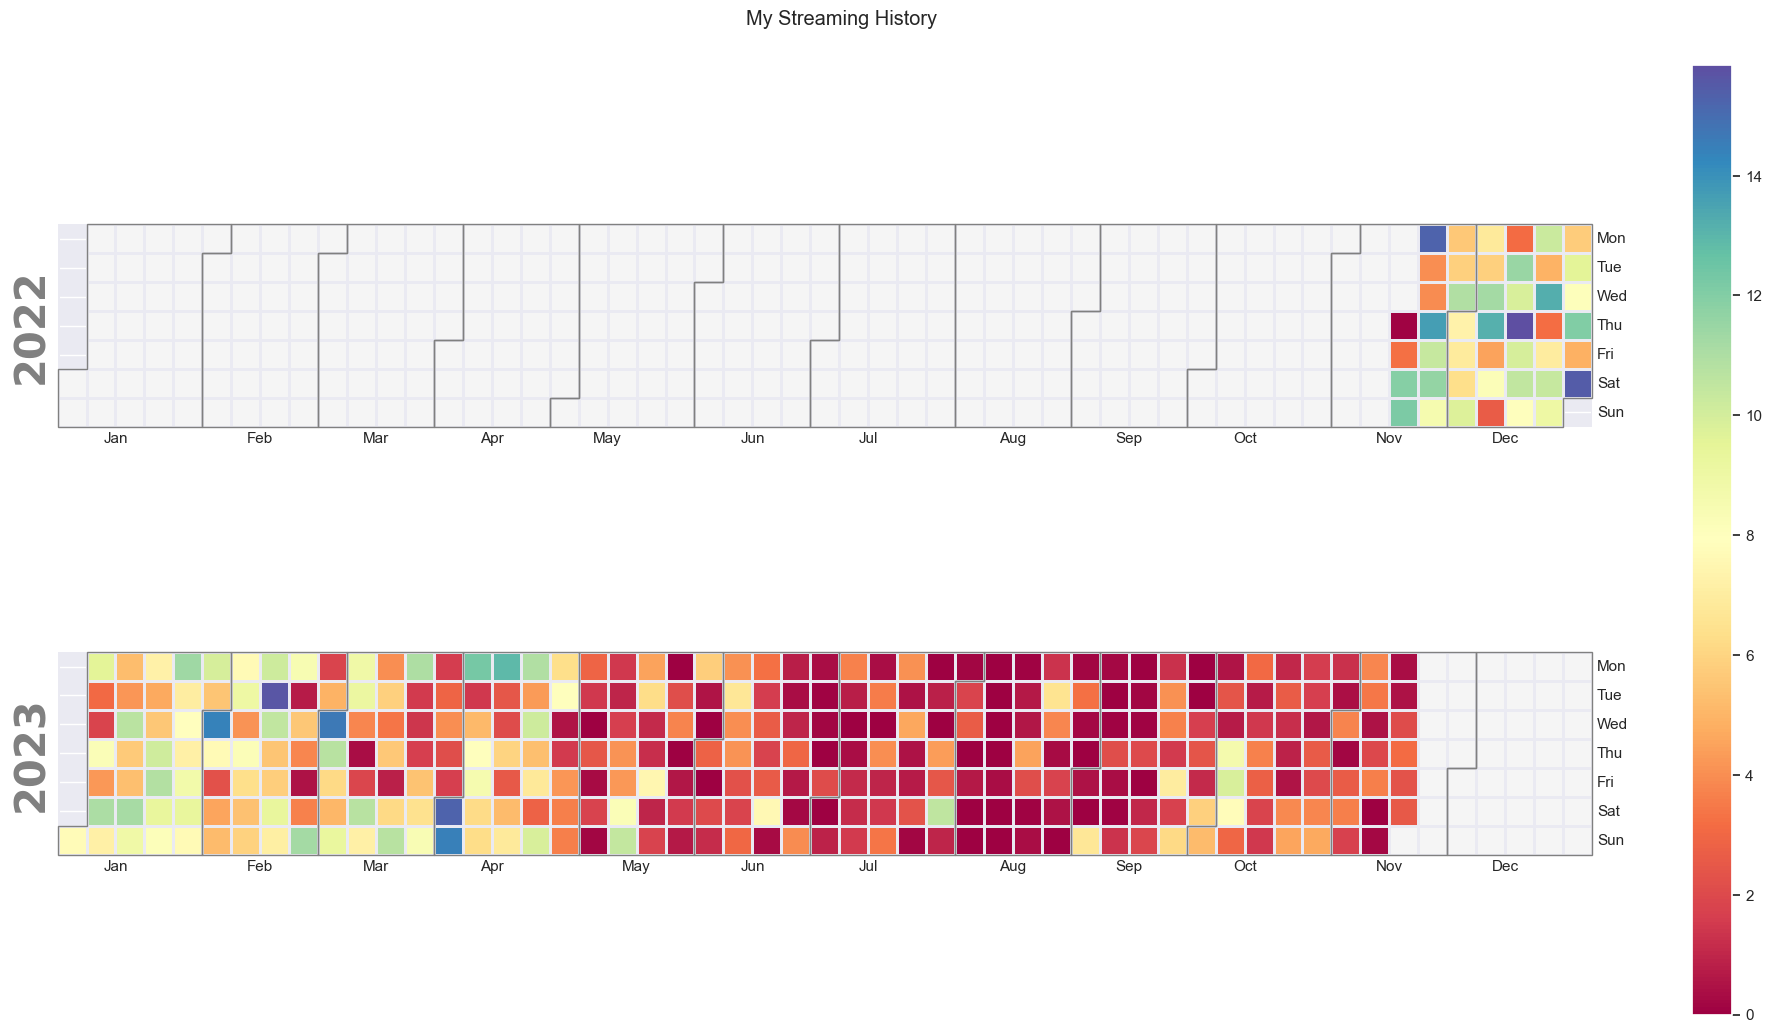

In [18]:
calplot.calplot(new_daily_length, figsize=(20,10), suptitle='My Streaming History', cmap='Spectral' )

As it can be seen that my streaming hours shot up drastically after Mid August 2022 which is due to the fact that I finished my most grilling exams of my 4th semester and for my 5th semeser I was left my only 2 courses so I used most of my time doing stuff which I like the most which is listening to music.

## Whom did I listened to most?

Here I will be plotting a graph to determine my most heard artist in this past year. 

In [19]:
my_streaming.head(2)
my_streaming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26973 entries, 0 to 26974
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   endTime       26973 non-null  object        
 1   artistName    26973 non-null  object        
 2   trackName     26973 non-null  object        
 3   msPlayed      26973 non-null  float64       
 4   mins_played   26973 non-null  float64       
 5   hours_played  26973 non-null  float64       
 6   date          26973 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.6+ MB


In [20]:
# grouping the dataset as per artist name and counting the songs per artist
#artist_length = my_streaming.groupby('artistName',as_index=False).sum()
artist_length = my_streaming.groupby('artistName', as_index=False).sum(numeric_only=True)

artist_song_cnt = my_streaming.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

In [21]:
# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)
artist_length_uniqsong.head(3)

artistName   msPlayed  mins_played  hours_played  unique_track_number
0       16BL   971950.0    16.199167      0.269986                    1
1    2 bucks   111000.0     1.850000      0.030833                    1
2   21street  8344607.0   139.076783      2.317946                    1

In [22]:
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])
max_time.tail()

artistName     msPlayed  mins_played  hours_played  \
1721           Mose  130171234.0  2169.520567     36.158676   
2724           U108  156674686.0  2611.244767     43.520746   
2576    The Bhaktas  167306936.0  2788.448933     46.474149   
2310  Shanti People  280061467.0  4667.691117     77.794852   
2425     Stan Kolev  512974376.0  8549.572933    142.492882   

      unique_track_number  
1721                   48  
2724                   30  
2576                   43  
2310                   56  
2425                  157

In [23]:
# top 30 artist I listen to (tail because the df is in ascending order of count of minutes)
most_heard_30 = max_time.tail(30)

C:\Users\mohit\AppData\Local\Temp\ipykernel_28528\3201389155.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_heard_30['hours_played'] = most_heard_30['mins_played'] / 60
C:\Users\mohit\AppData\Local\Temp\ipykernel_28528\3201389155.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=most_heard_30_sorted['artistName'], x=most_heard_30_sorted['hours_played'], palette='viridis')


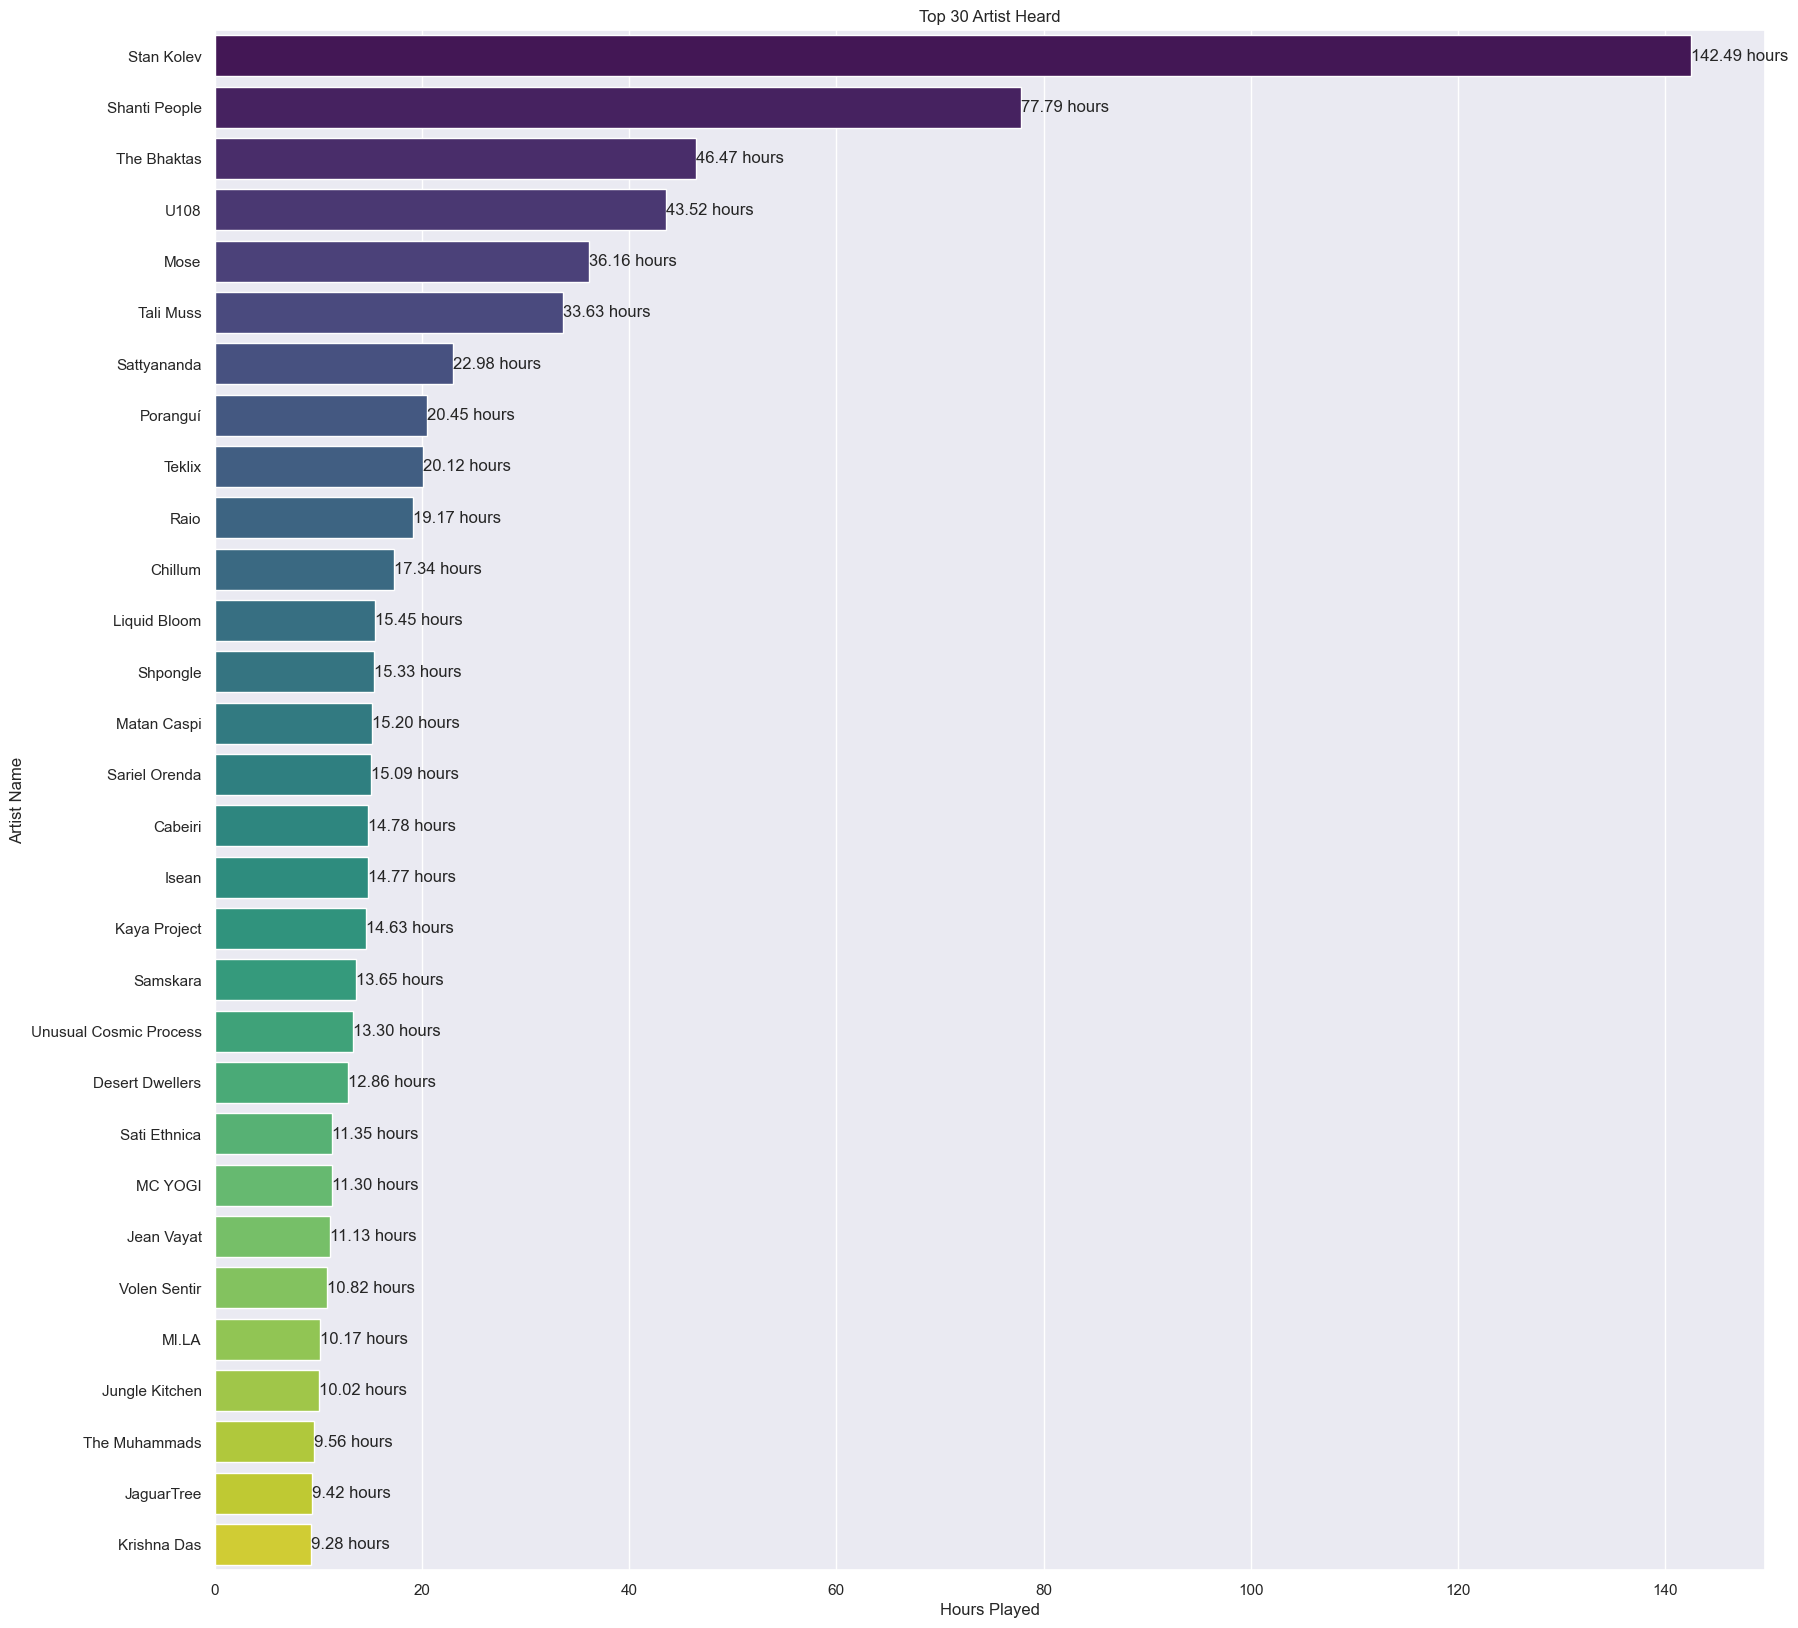

In [24]:
# barplot artist vs hours_played
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (20, 20)

# Convert 'mins_played' to hours
most_heard_30['hours_played'] = most_heard_30['mins_played'] / 60

# Sort the DataFrame in descending order based on 'hours_played'
most_heard_30_sorted = most_heard_30.sort_values('hours_played', ascending=False)

# Set the colormap to 'viridis' for dark to light colors
ax = sns.barplot(y=most_heard_30_sorted['artistName'], x=most_heard_30_sorted['hours_played'], palette='viridis')

plt.title('Top 30 Artist Heard')
plt.xlabel('Hours Played')
plt.ylabel('Artist Name')

# Add the 'hours_played' values on the bars
for i, value in enumerate(most_heard_30_sorted['hours_played']):
    ax.text(value, i, f'{value:.2f} hours', va='center')

plt.show()



TypeError: cannot unpack non-iterable float object

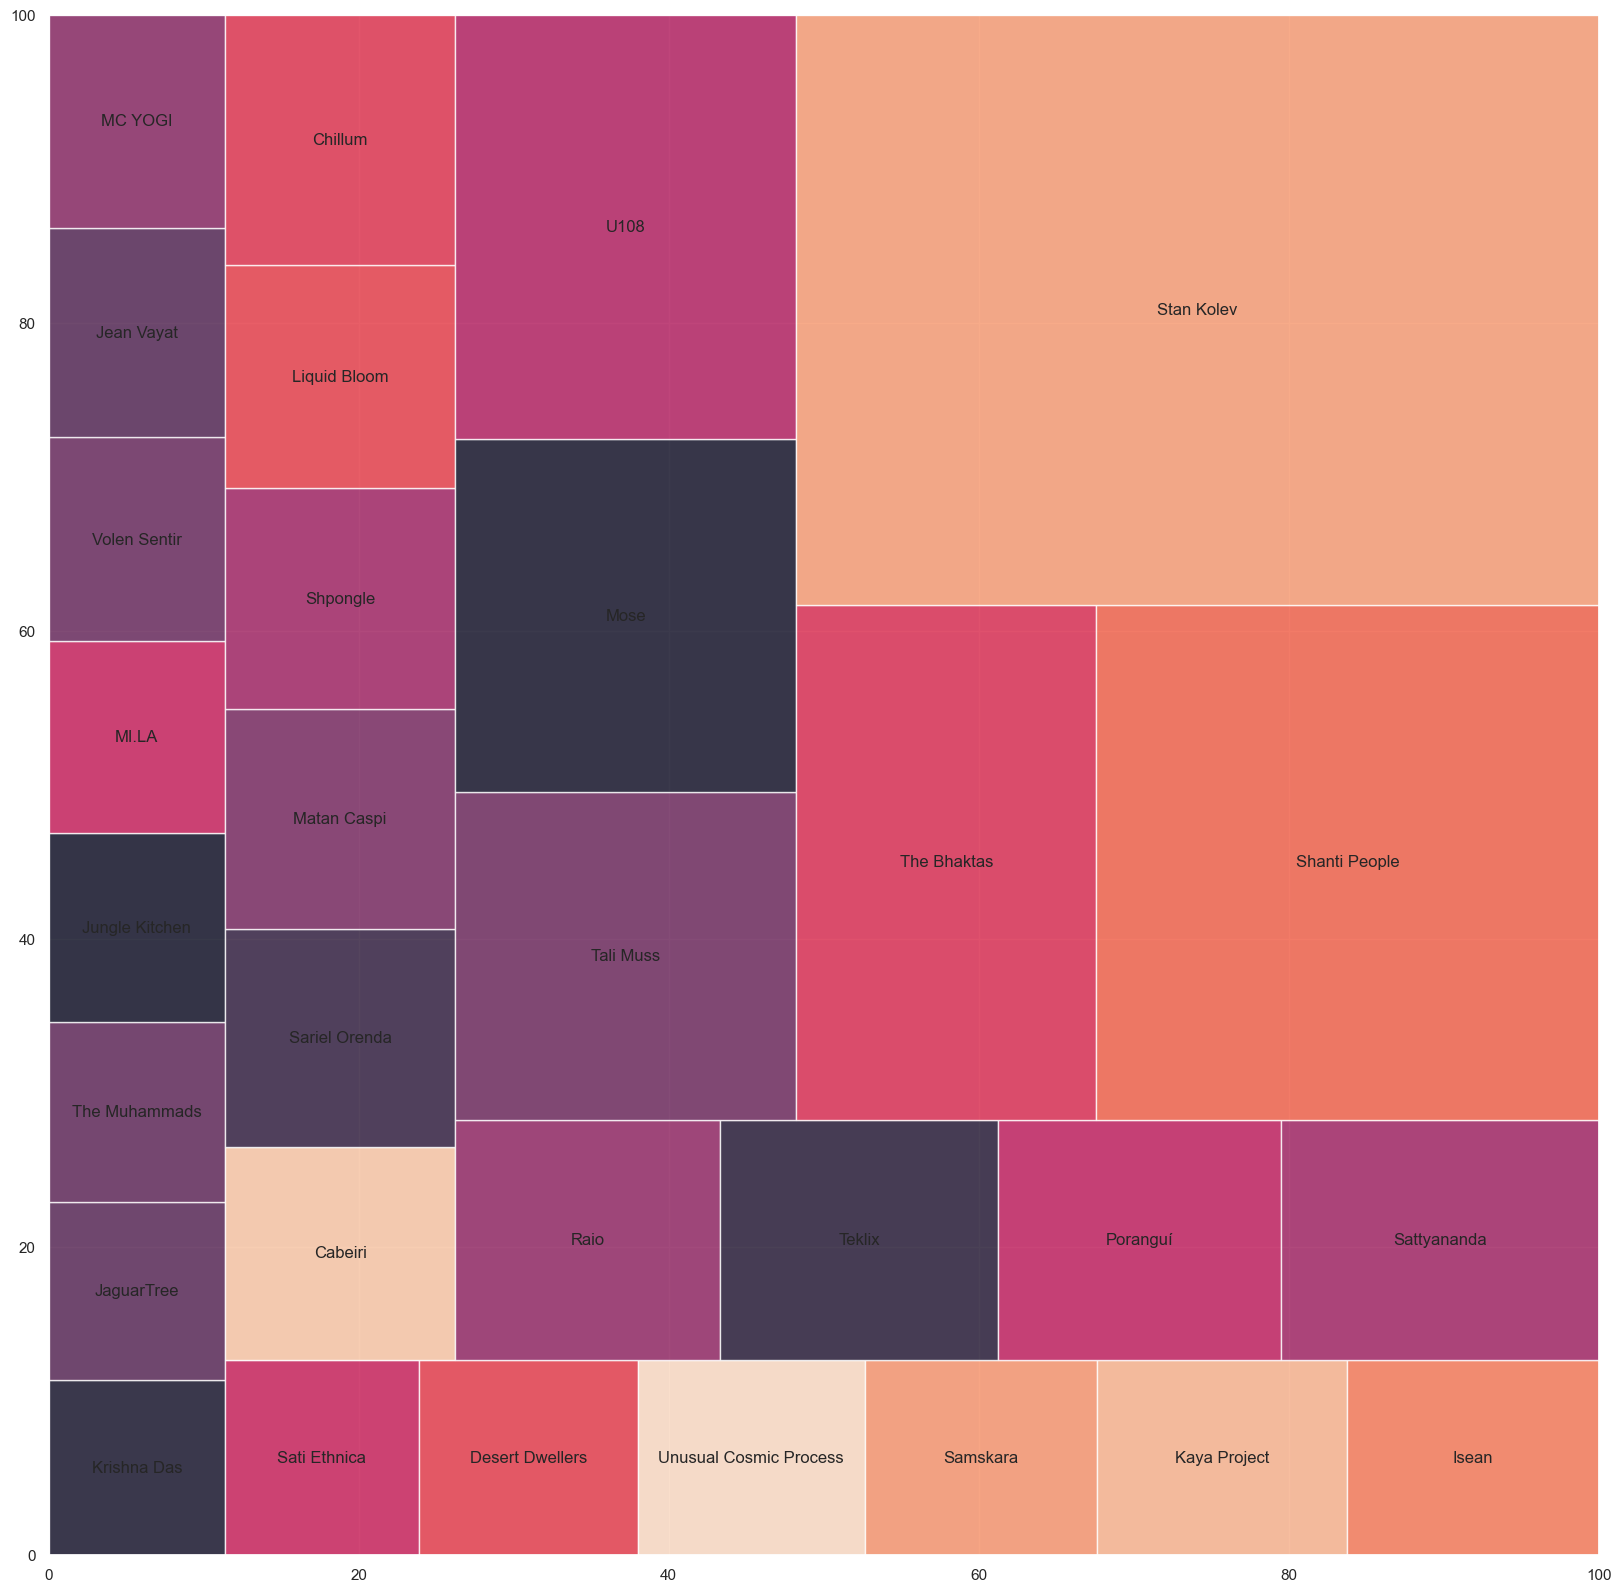

In [26]:
import matplotlib.pyplot as plt
import squarify

# Create a list of values and labels for the treemap
values = most_heard_30['hours_played']
labels = most_heard_30['artistName']

# Calculate the sizes of the treemap cells
sizes = squarify.normalize_sizes(values, dx=10, dy=10)

# Create the treemap
plt.figure(figsize=(20, 20))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)

# Add labels to the treemap cells
for i, (label, value, size) in enumerate(zip(labels, values, sizes)):
    x, y, dx, dy = size
    plt.text(x + dx / 2, y + dy / 2, f'{value:.2f} hours', fontsize=10, ha='center', va='center')

# Set plot title and axis labels
plt.title('Top 30 Artists (Hours Played)')
plt.axis('off')

# Display the treemap
plt.show()




Since the bar graph could only show 30 artist clearly. In the next plot, I have made a word cloud, where I am representing my top 100 artists  with no compromise in clarity.

In [27]:
# converted df to dict
artist_freq = dict(zip(artist_length_uniqsong['artistName'].tolist(), artist_length_uniqsong['mins_played'].tolist()))

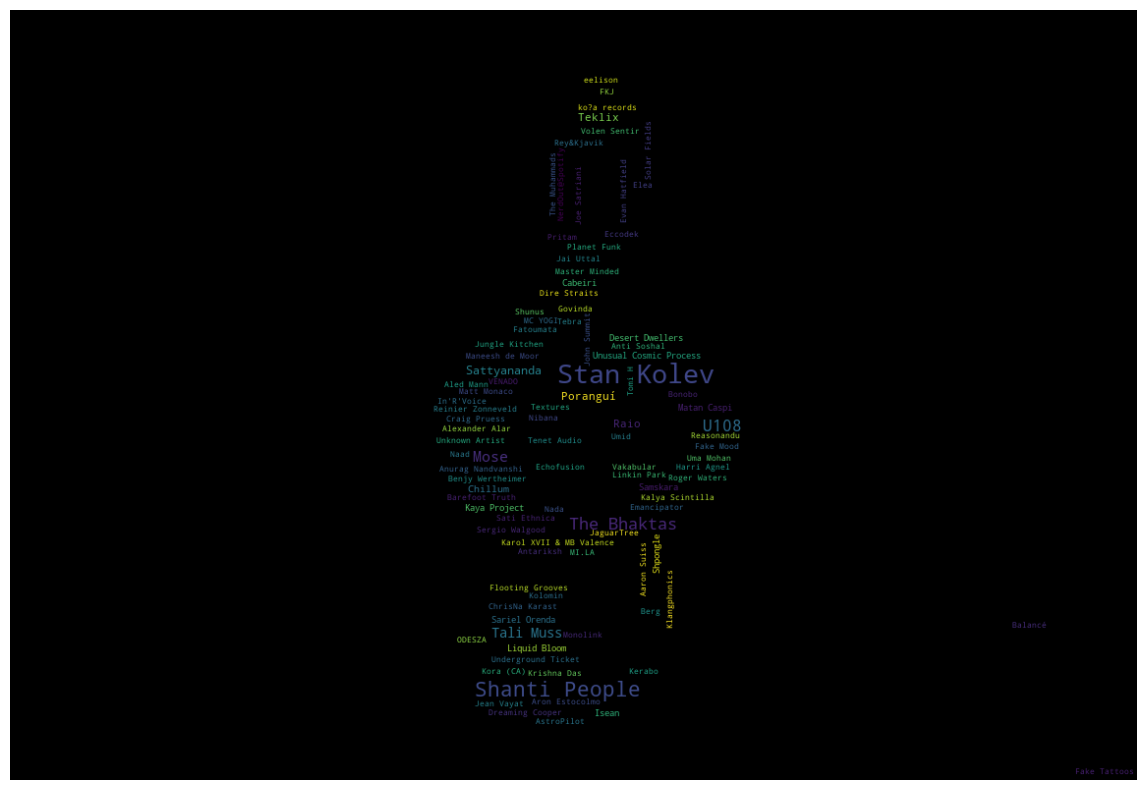

In [30]:

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from nltk.corpus import stopwords


# Load the vinyl record image as the mask
vinyl_mask = np.array(Image.open('spotify data scraping/wc_mask_imgs/music_ann.png'))

from wordcloud import WordCloud

wc = WordCloud(background_color='black',width=800, height=400, max_words=100, mask =vinyl_mask ).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()






As you can see in the  above graph, the bigger the artist the name, the most I listened to the artist. Moreover, this plot easily inculacate 100 artists.

In [34]:
import pandas as pd

# Assuming my_streaming is your DataFrame
my_streaming['msPlayed'] = pd.to_numeric(my_streaming['hours_played'], errors='coerce')

# Group by trackName and sum the msPlayed for each song
top_songs = my_streaming.groupby('trackName')['hours_played'].sum()

# Find the top 5 listened songs
top_5_songs = top_songs.nlargest(5)

# Display the results
print(top_5_songs)


trackName
Ananda - QDream Remix                         18.508307
Shivoham                                      16.964835
Ananda - Original Mix                         15.734661
Adi Shakti - Jungle Kitchen Remix             14.432086
Juggling Molecules - Desert Dwellers Remix    13.983277
Name: hours_played, dtype: float64


AttributeError: 'Patch3D' object has no attribute 'get_height'

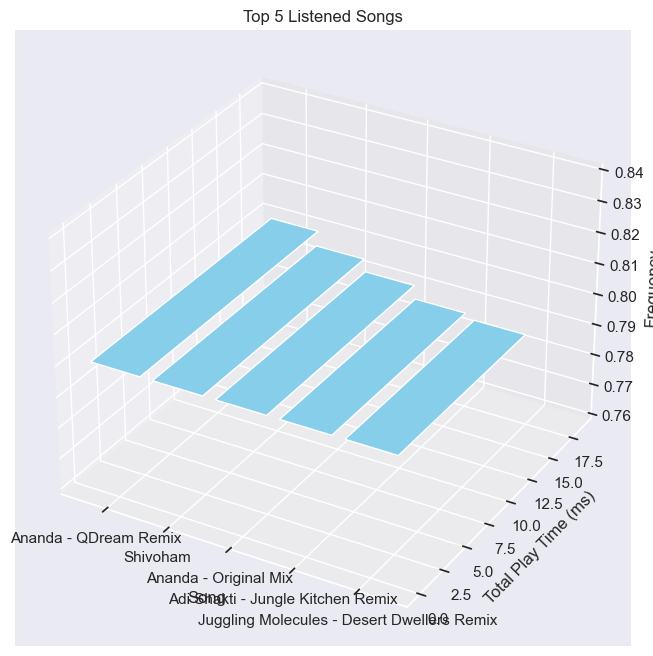

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming my_streaming is your DataFrame
my_streaming['msPlayed'] = pd.to_numeric(my_streaming['msPlayed'], errors='coerce')

# Group by trackName and sum the msPlayed for each song
top_songs = my_streaming.groupby('trackName')['msPlayed'].sum()

# Find the top 5 listened songs
top_5_songs = top_songs.nlargest(5)

# Create a 3D bar plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
bars = ax.bar(top_5_songs.index, top_5_songs, 0.8, color='skyblue')

# Add labels and title
ax.set_xlabel('Song')
ax.set_ylabel('Total Play Time (ms)')
ax.set_zlabel('Frequency')
ax.set_title('Top 5 Listened Songs')

# Add data values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom')

plt.show()


In [38]:
import pandas as pd
import pandas_alive

elec_df = pd.read_csv("data/Aus_Elec_Gen_1980_2018.csv",index_col=0,parse_dates=[0],thousands=',')

elec_df.fillna(0).plot_animated('examples/example-electricity-generated-australia.gif',period_fmt="%Y",title='Australian Electricity Generation Sources 1980-2018')

ModuleNotFoundError: No module named 'pandas_alive'

Let's look at the list of artists for whom I have listened the minimum of 5 songs.

In [31]:
max_songs = artist_length_uniqsong.loc[artist_length_uniqsong['unique_track_number'] > 5]

C:\Users\mohit\AppData\Local\Temp\ipykernel_28528\3365008032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = max_songs['artistName'], x = max_songs['unique_track_number'], palette='rocket_r')


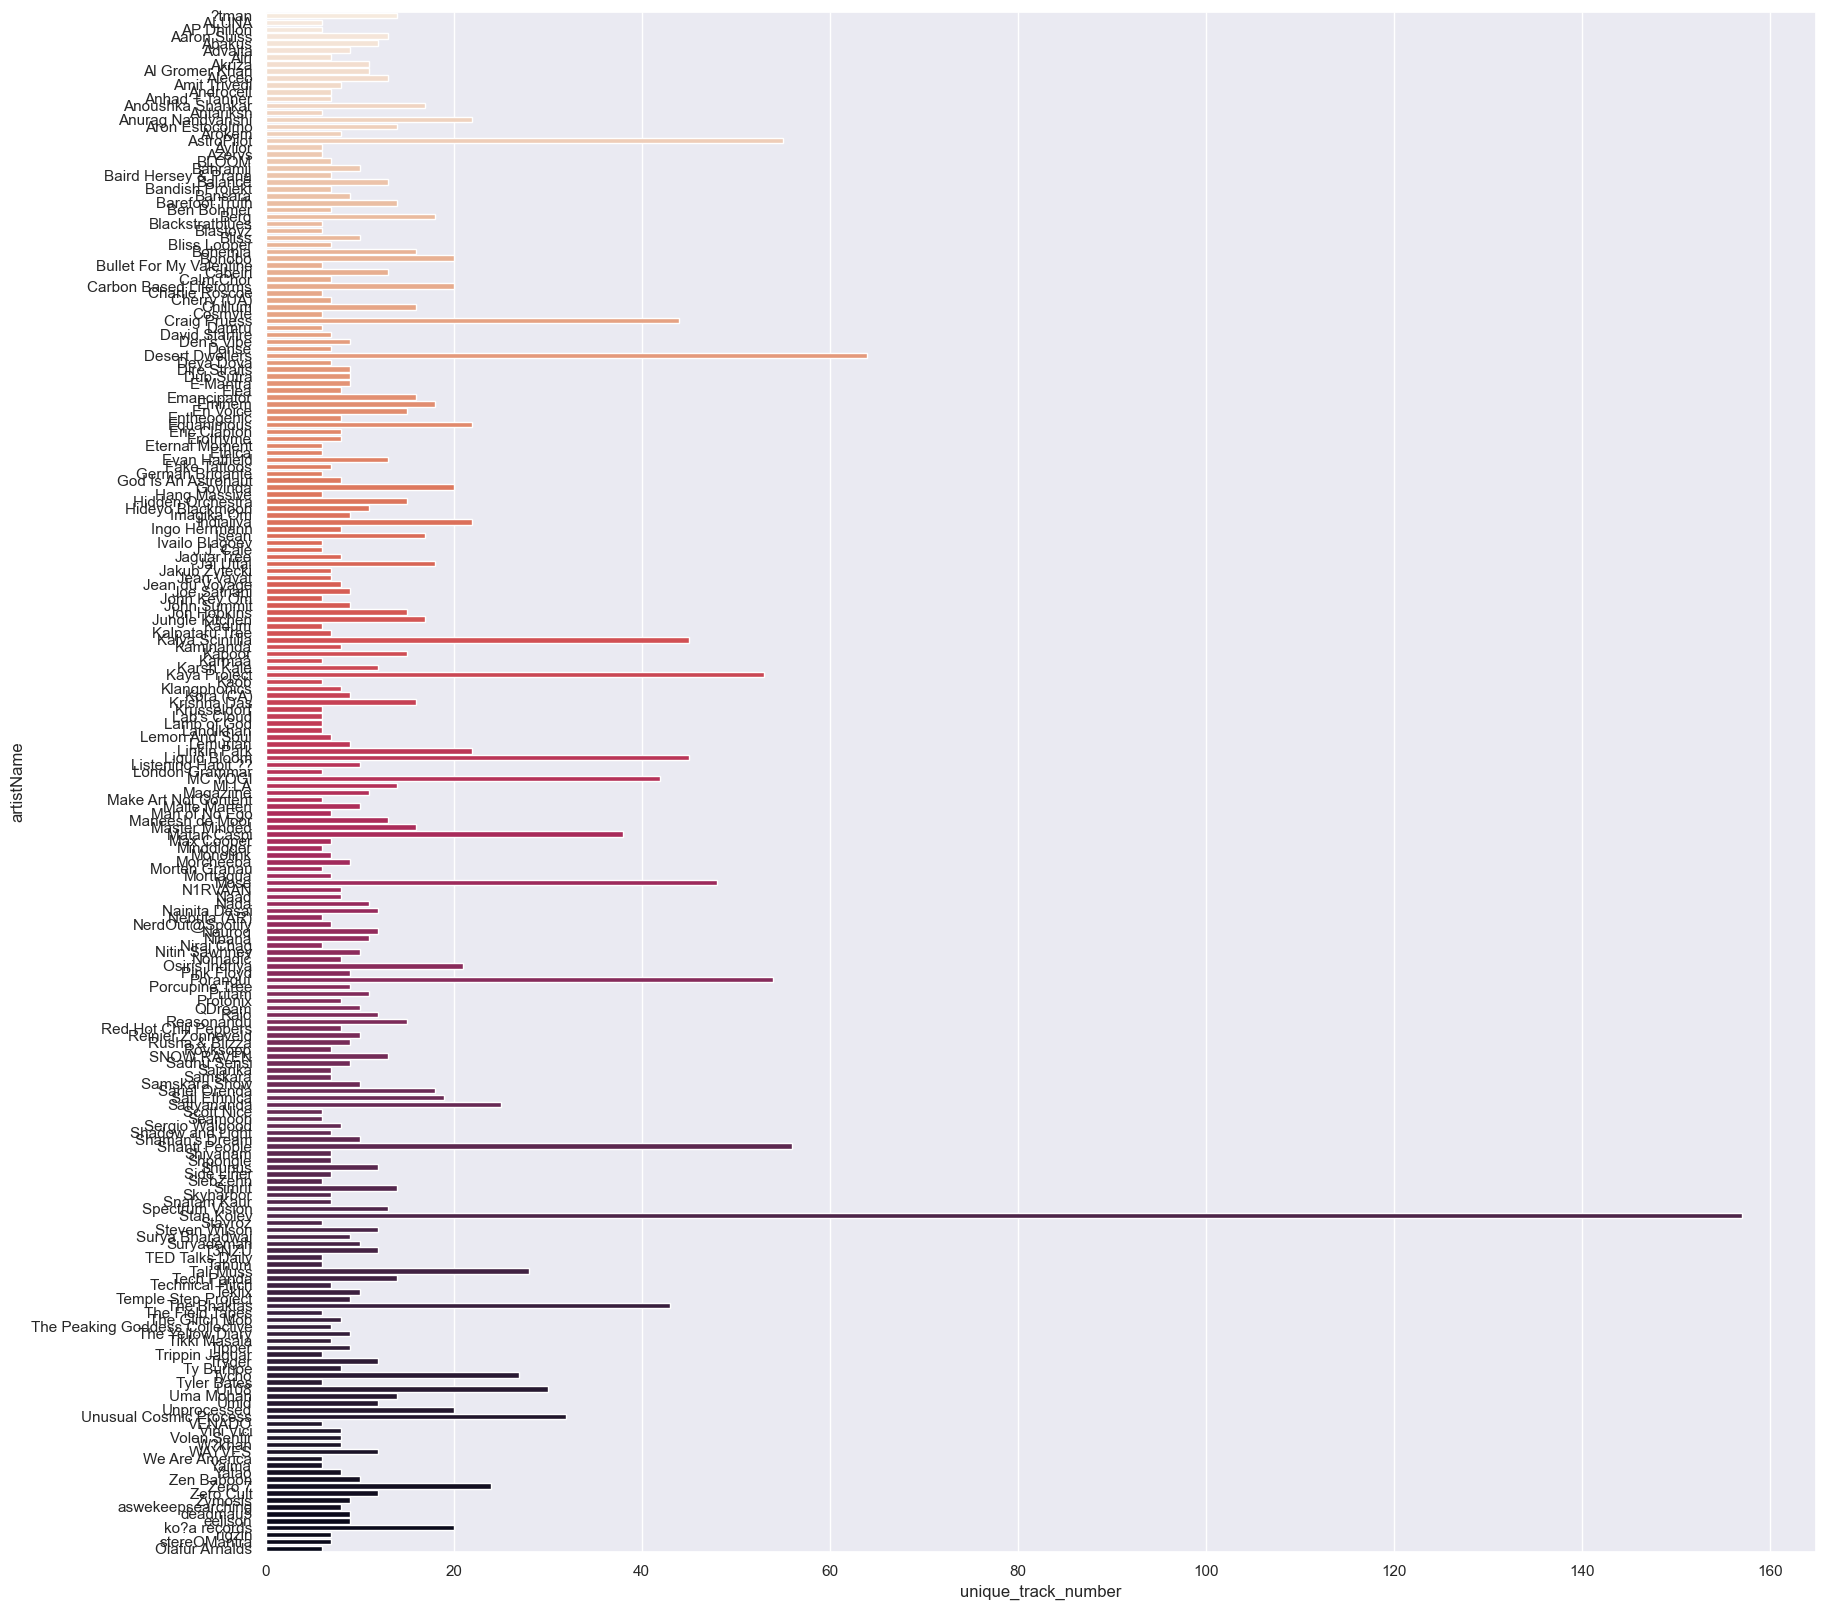

In [32]:
sns.barplot(y = max_songs['artistName'], x = max_songs['unique_track_number'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (20,20)

## My mood throughout the year.

In [126]:
my_streaming.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'time_signature', 'mins_played', 'hours_played', 'date'],
      dtype='object')

In [127]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [128]:
valence = my_streaming.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

In [129]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
val.head()

date     min      mean    max
0 2022-05-11  0.0174  0.196246  0.934
1 2022-05-12  0.0358  0.374750  0.935
2 2022-05-13  0.0312  0.385863  0.972
3 2022-05-14  0.0325  0.333018  0.965
4 2022-05-15  0.0206  0.461196  0.965

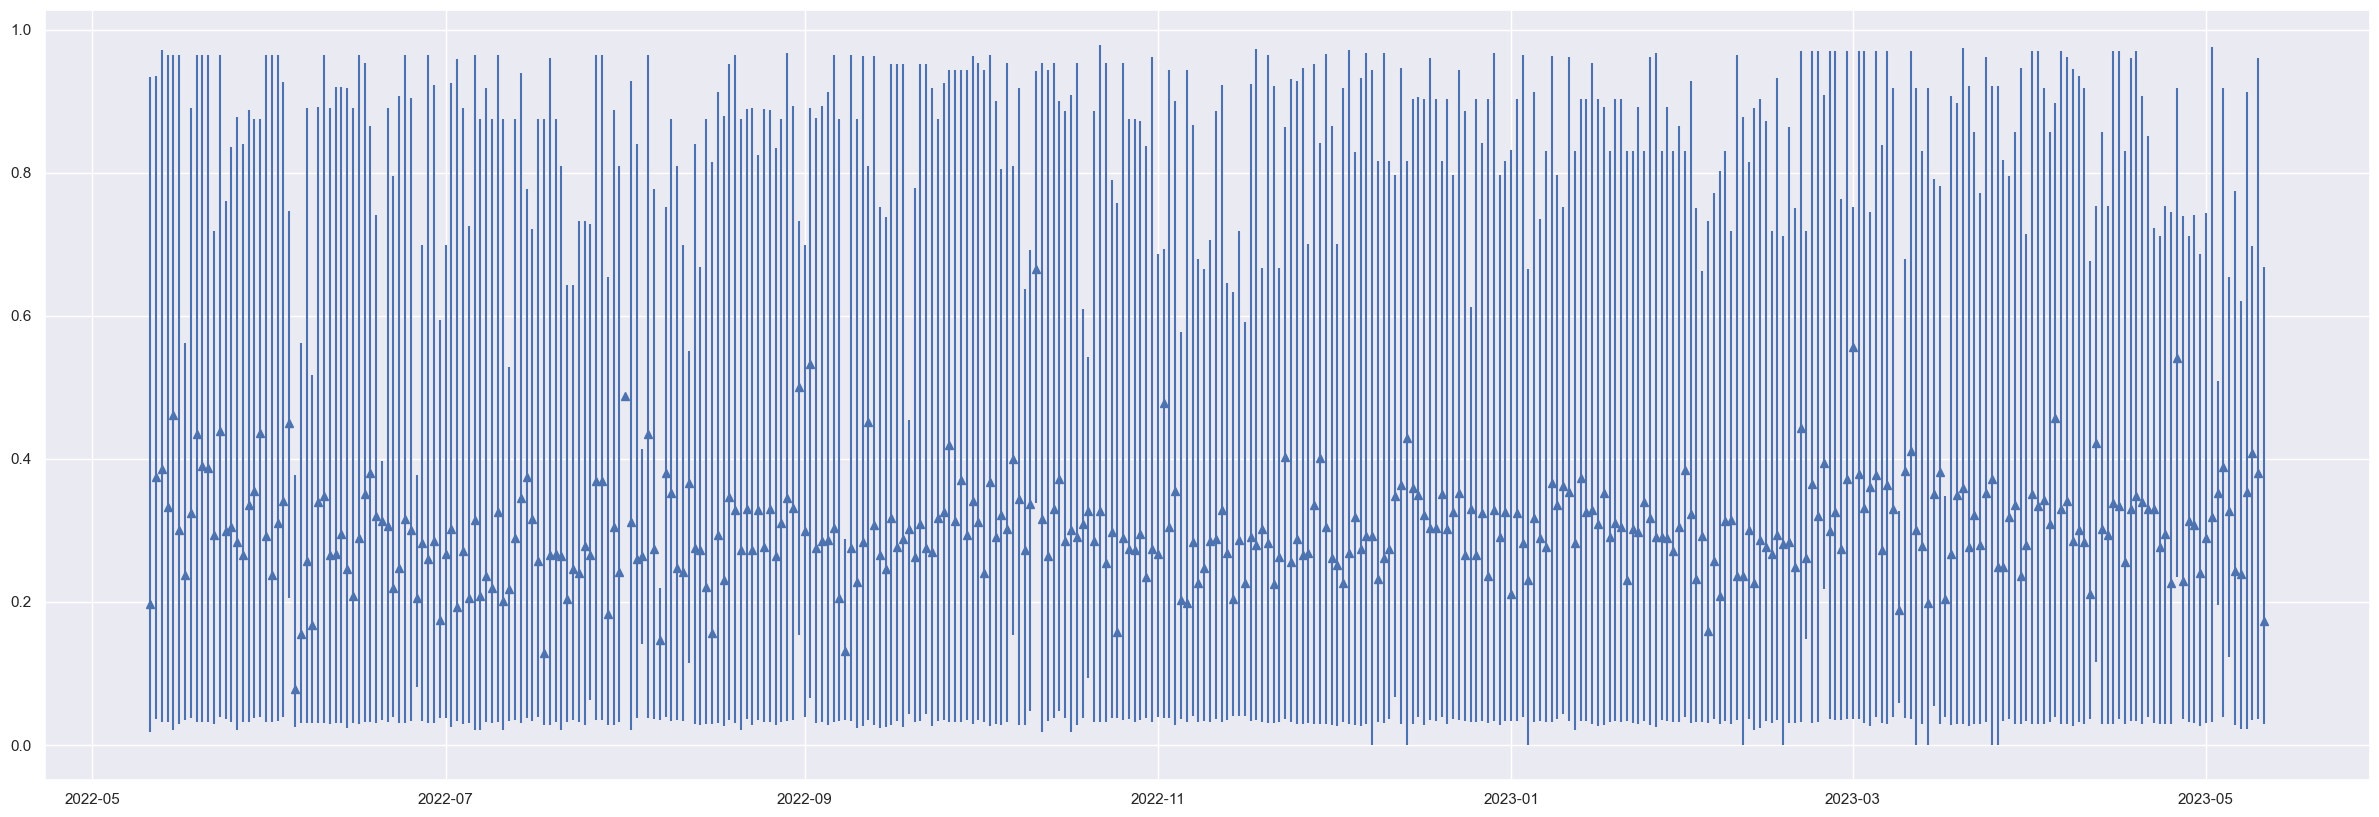

In [130]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

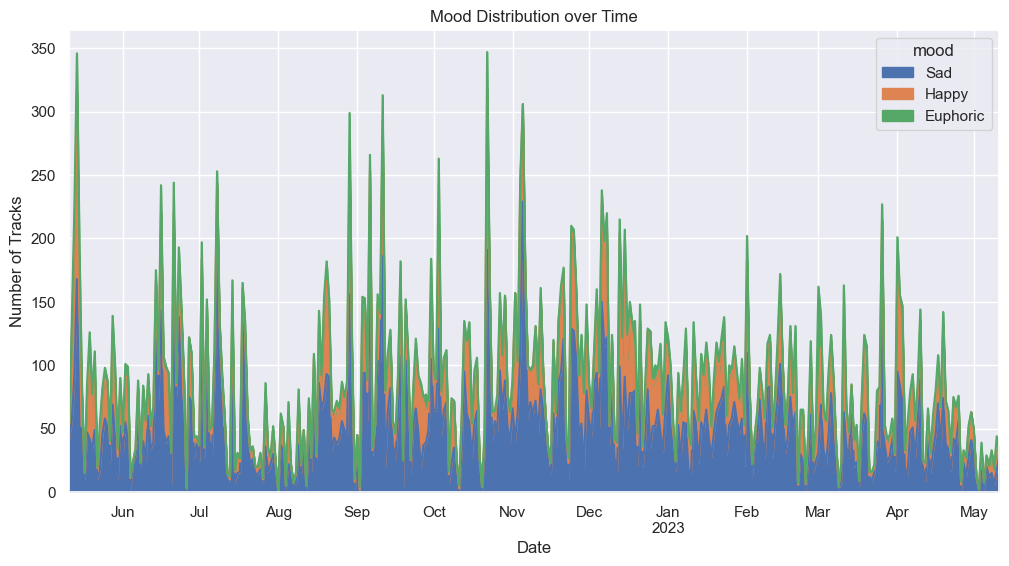

In [131]:
# Define mood threshold values
happy_threshold = 0.7
sad_threshold = 0.3

# Create a new column 'mood' based on the valence values
my_streaming['mood'] = pd.cut(my_streaming['valence'], bins=[0, sad_threshold, happy_threshold, 1], labels=['Sad', 'Happy', 'Euphoric'])

# Group the data by 'date' and 'mood' and count the number of occurrences
mood_counts = my_streaming.groupby(['date', 'mood']).size().unstack().fillna(0)

# Plot the mood counts over time
plt.rcParams["figure.figsize"] = (12, 6)
mood_counts.plot(kind='area', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Tracks')
plt.title('Mood Distribution over Time')
plt.show()


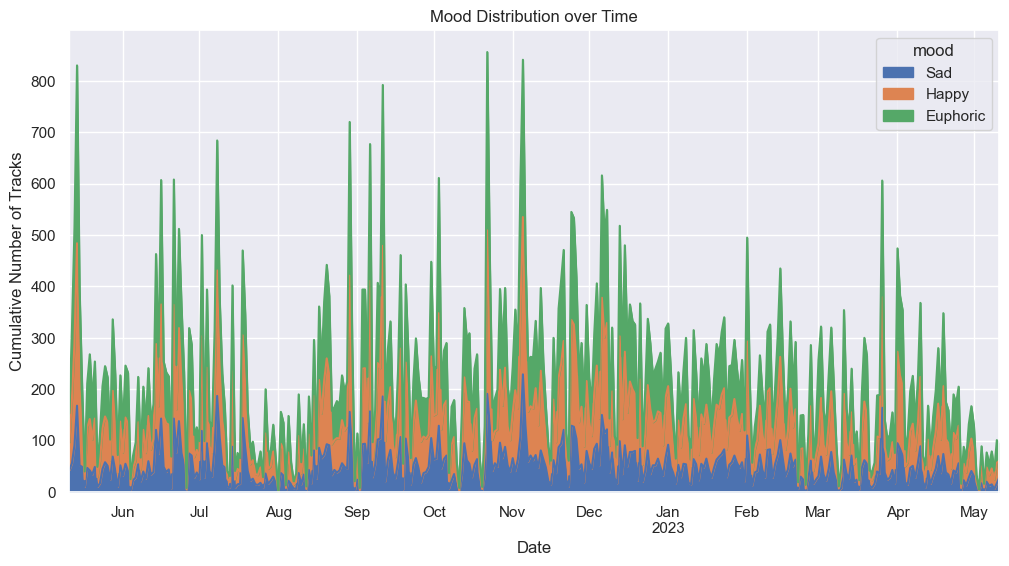

In [132]:
# Group the data by 'date' and 'mood' and count the number of occurrences
mood_counts = my_streaming.groupby(['date', 'mood']).size().unstack().fillna(0)

# Calculate the cumulative sum of mood counts
mood_cumulative = mood_counts.cumsum(axis=1)

# Plot the stacked area plot
plt.rcParams["figure.figsize"] = (12, 6)
mood_cumulative.plot(kind='area', stacked=True)
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Tracks')
plt.title('Mood Distribution over Time')
plt.show()


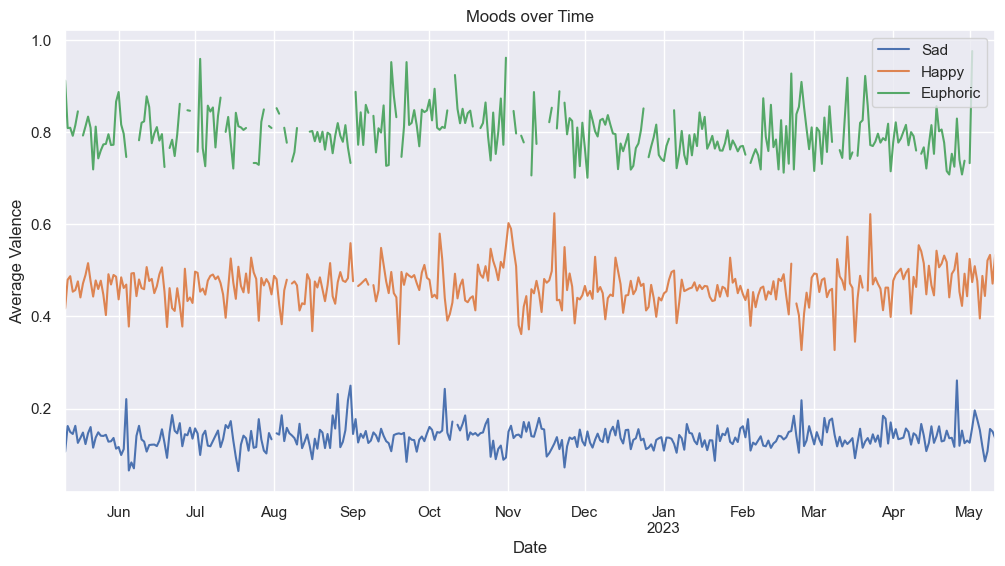

In [133]:
# Group the data by 'date' and 'mood' and calculate the average valence
mood_average = my_streaming.groupby(['date', 'mood'])['valence'].mean().unstack()

# Plot the line plot
plt.rcParams["figure.figsize"] = (12, 6)
mood_average.plot()
plt.xlabel('Date')
plt.ylabel('Average Valence')
plt.title('Moods over Time')
plt.legend(loc='best')
plt.show()


Upo seggregating the valence in different bins of sad, happy and euphoric moods , I can observe that I listened to all types of music pertaining to different moods.

Similarly, lets' plot a graph for dance and energy.

In [154]:
energy = my_streaming.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streaming.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

In [155]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

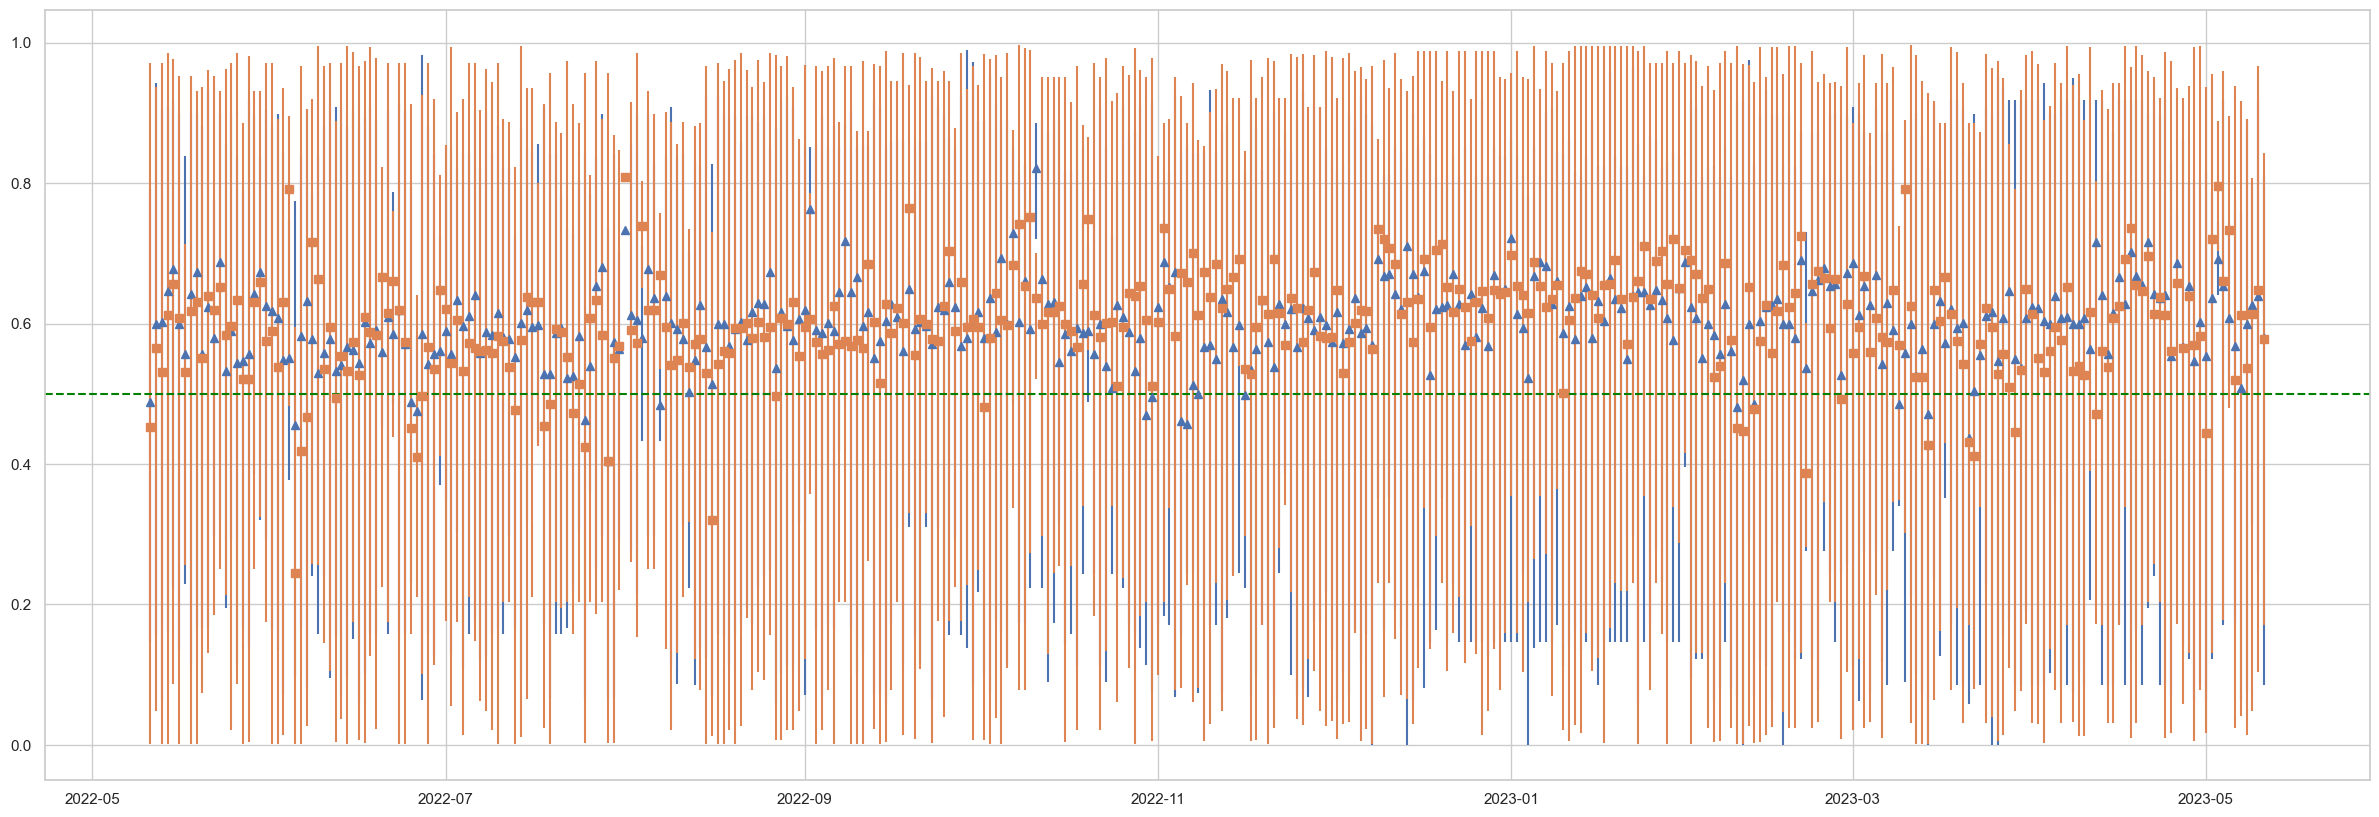

In [156]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

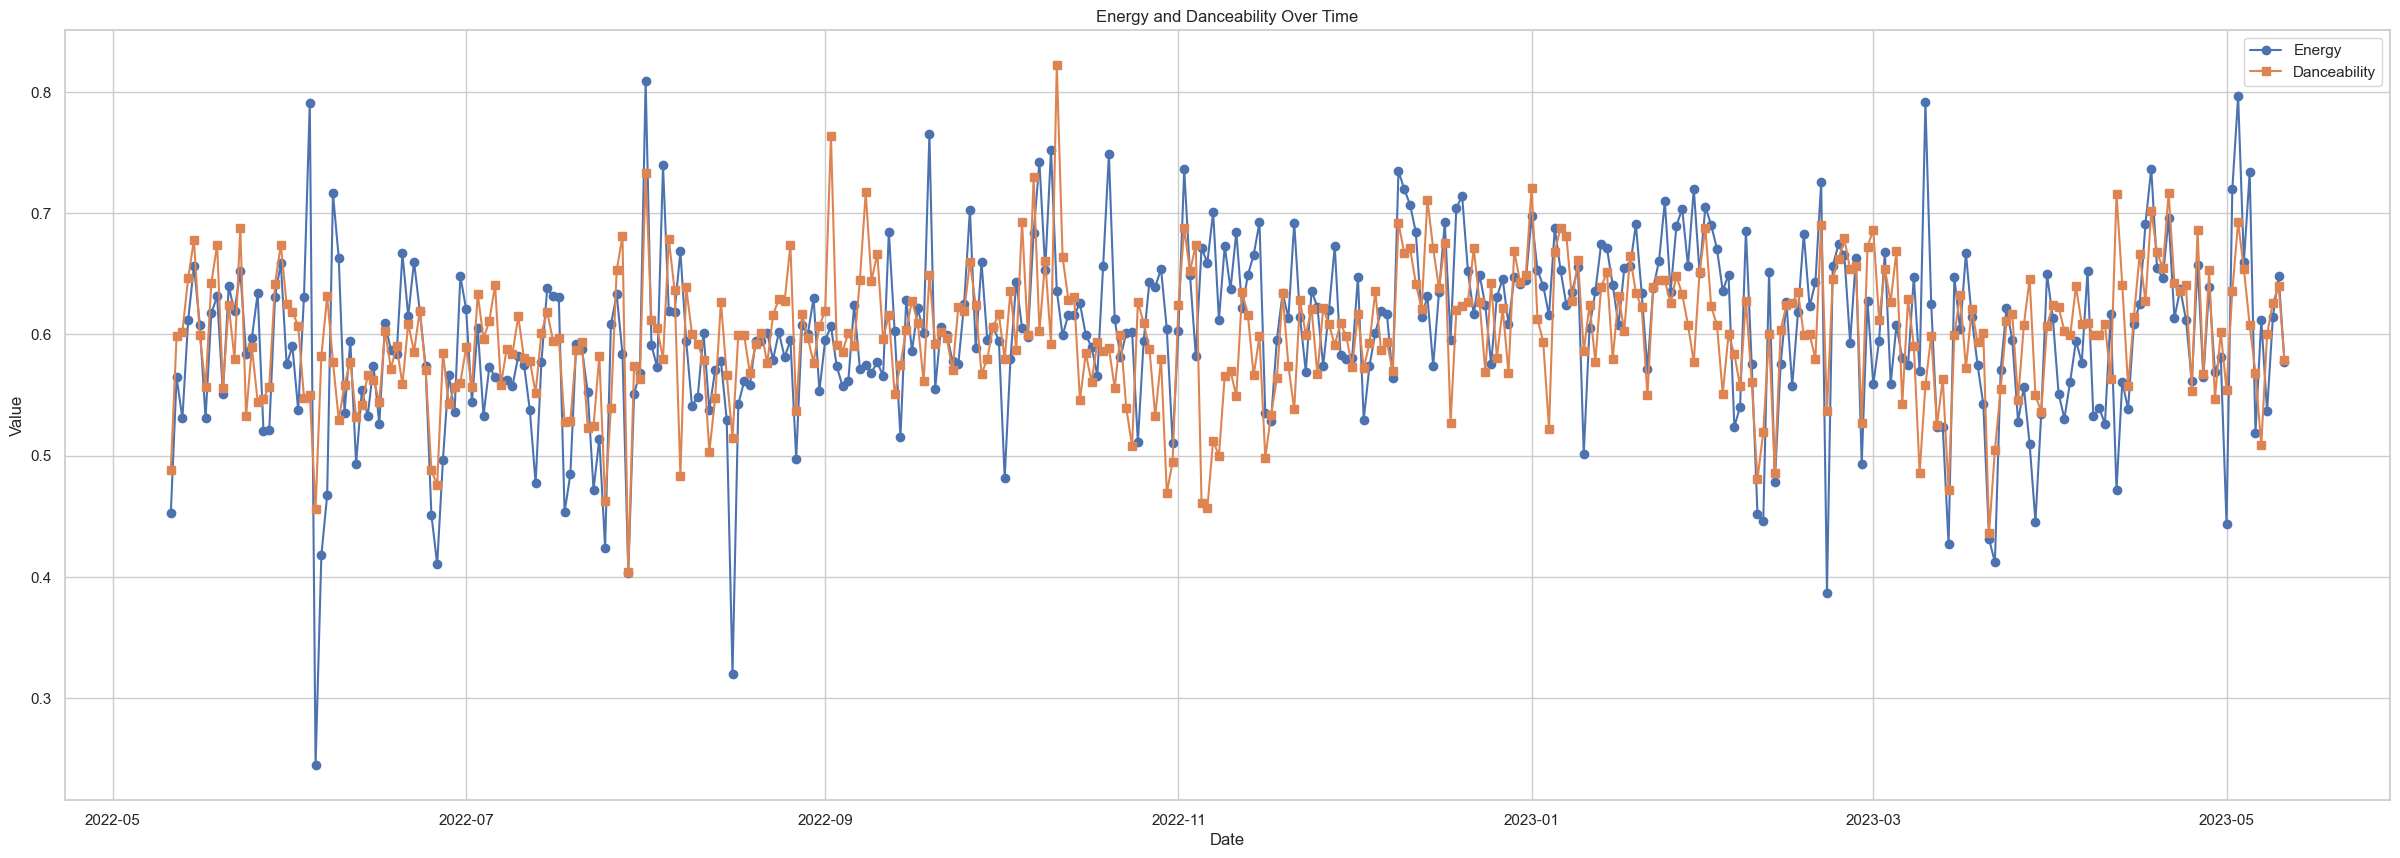

In [157]:
energy = my_streaming.groupby('date')['energy'].mean()
dance = my_streaming.groupby('date')['danceability'].mean()

plt.rcParams["figure.figsize"] = (30, 10)
plt.plot(energy.index, energy, marker='o', label='Energy')
plt.plot(dance.index, dance, marker='s', label='Danceability')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Energy and Danceability Over Time')
plt.legend()

plt.show()


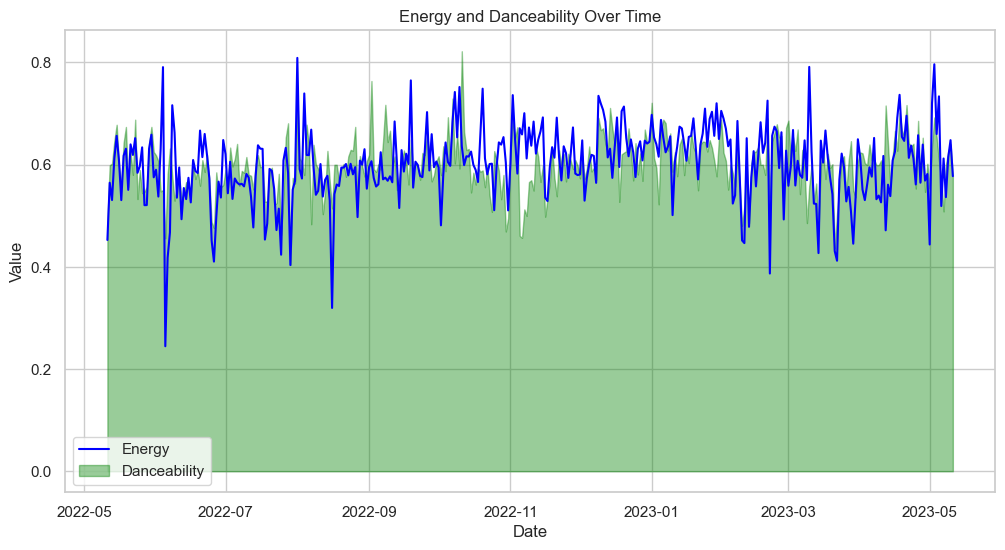

In [159]:
import matplotlib.pyplot as plt

# Group the data by date and calculate the mean values
energy = my_streaming.groupby('date')['energy'].mean()
danceability = my_streaming.groupby('date')['danceability'].mean()

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the energy values as a line plot
ax.plot(energy.index, energy, color='blue', label='Energy')

# Plot the danceability values as an area plot
ax.fill_between(danceability.index, 0, danceability, color='green', alpha=0.4, label='Danceability')

# Set labels for x-axis and y-axis
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set a title for the plot
plt.title('Energy and Danceability Over Time')

# Display a legend
plt.legend()

# Show the plot
plt.show()


# 2. Feature Analysis

In this section, I will analyse the song features.

In [160]:
distinct_song = pd.read_csv('data\mohit_distinct_song.csv')
distinct_song = distinct_song.drop(columns=['Unnamed: 0'])

## Histogram

In [161]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

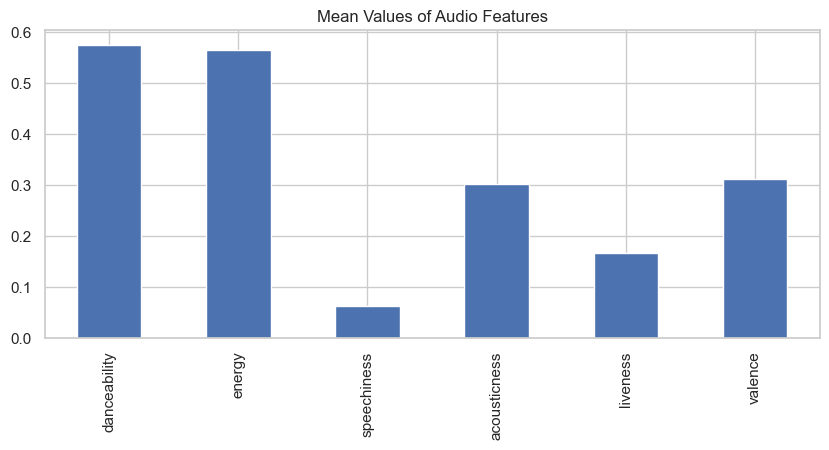

In [162]:
small = distinct_song[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

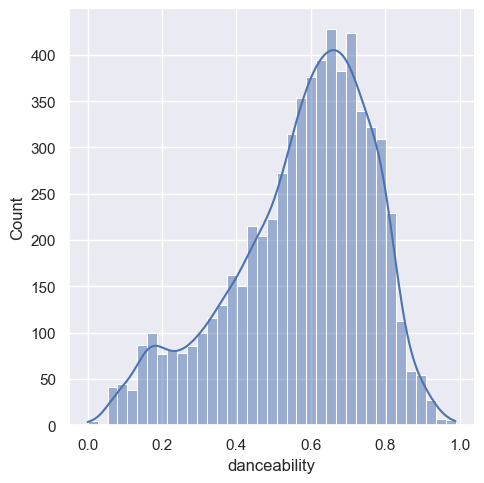

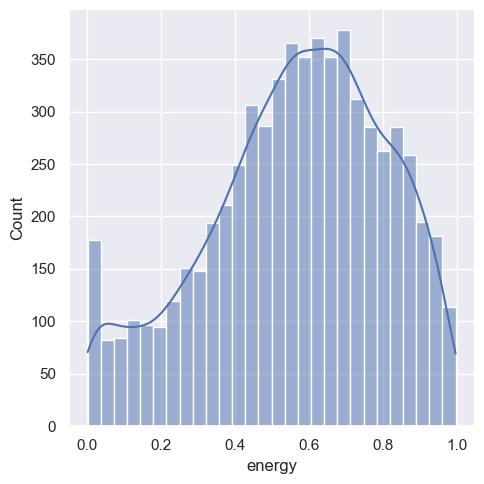

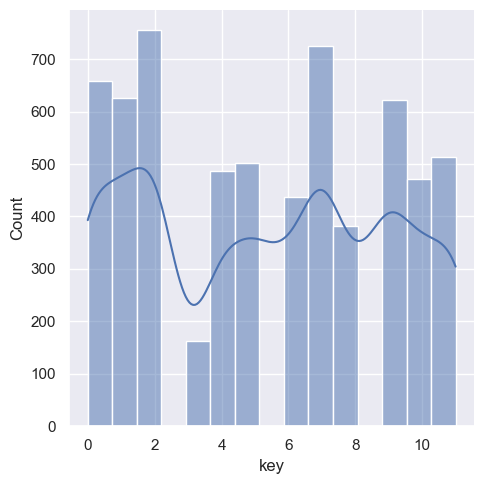

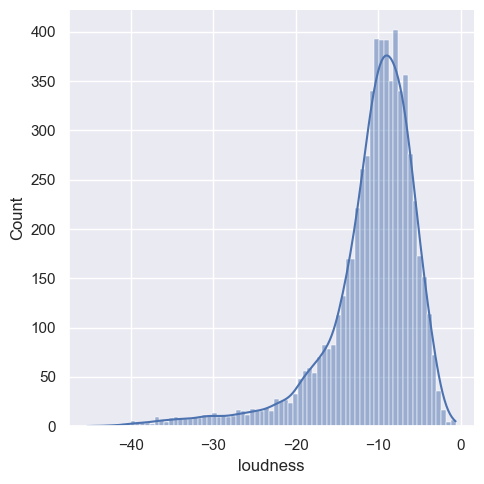

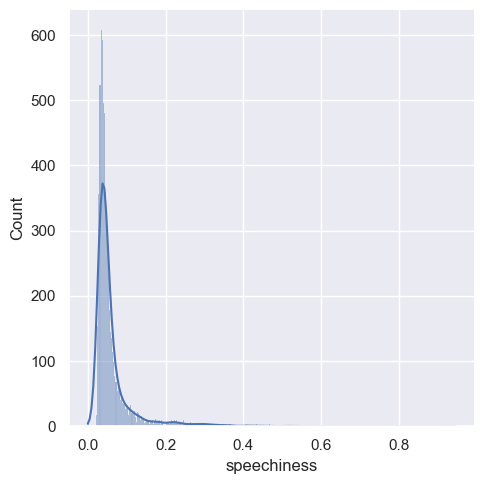

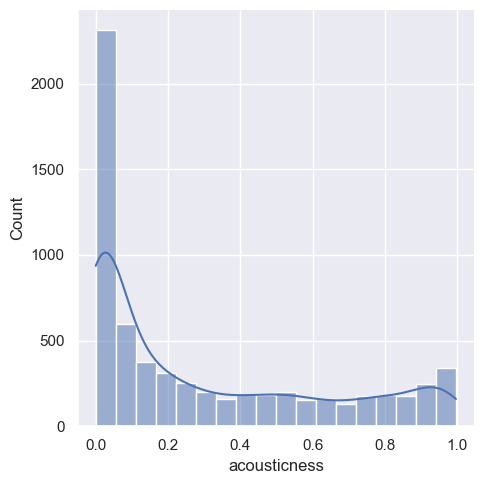

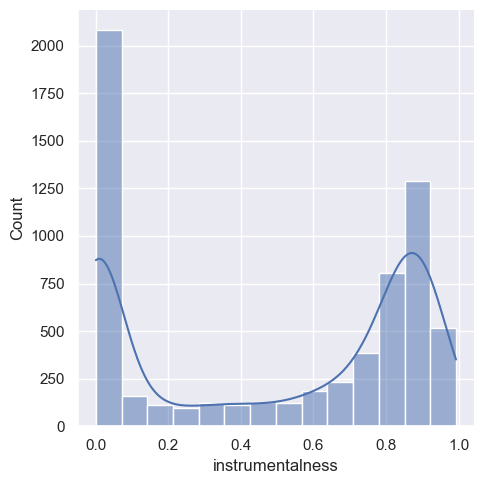

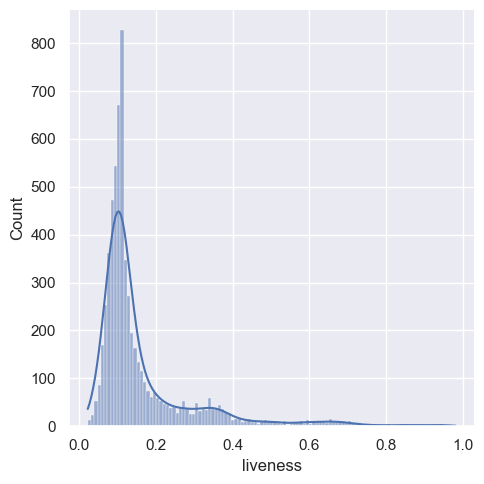

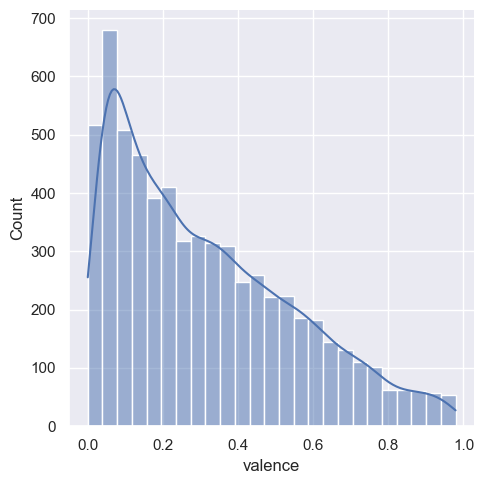

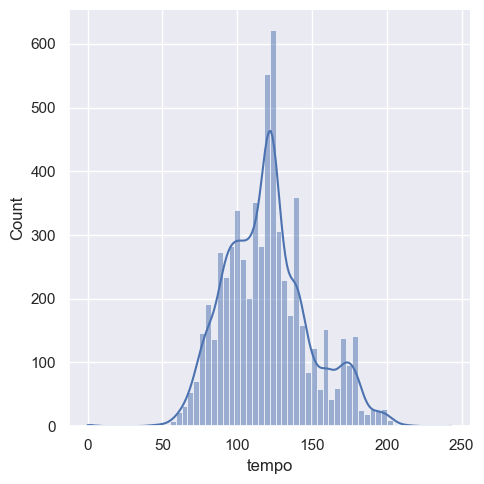

In [30]:
for col in features:
  sns.displot(distinct_song, x=col, kde=True)
  plt.show()

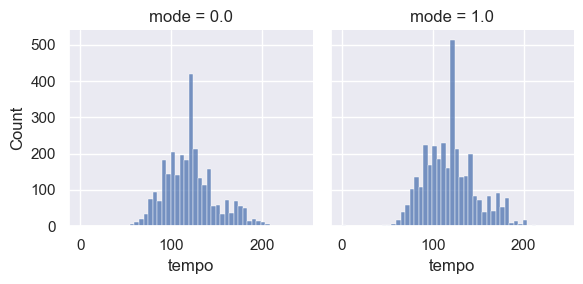

In [31]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(distinct_song, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

<Axes: xlabel='key', ylabel='count'>

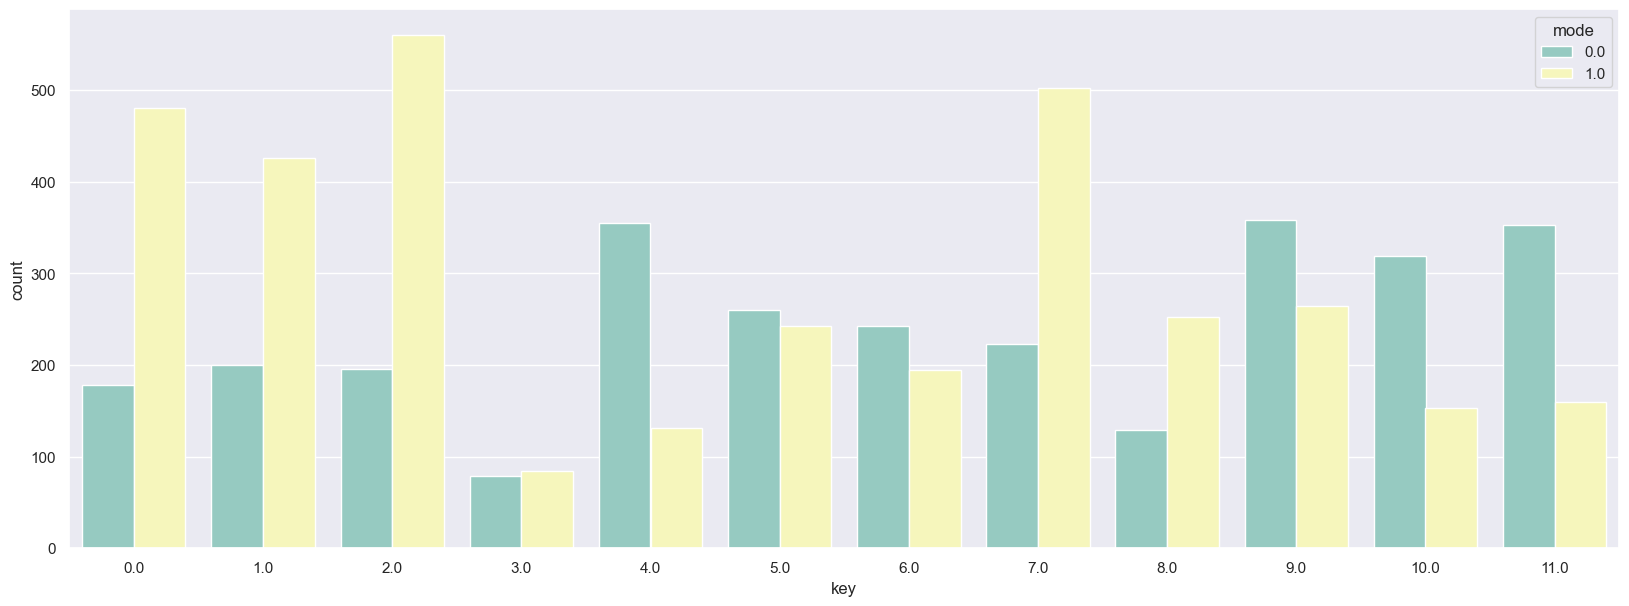

In [32]:
sns.countplot(data=distinct_song, x='key', hue='mode', palette = 'Set3')

## Heatmap

<Axes: >

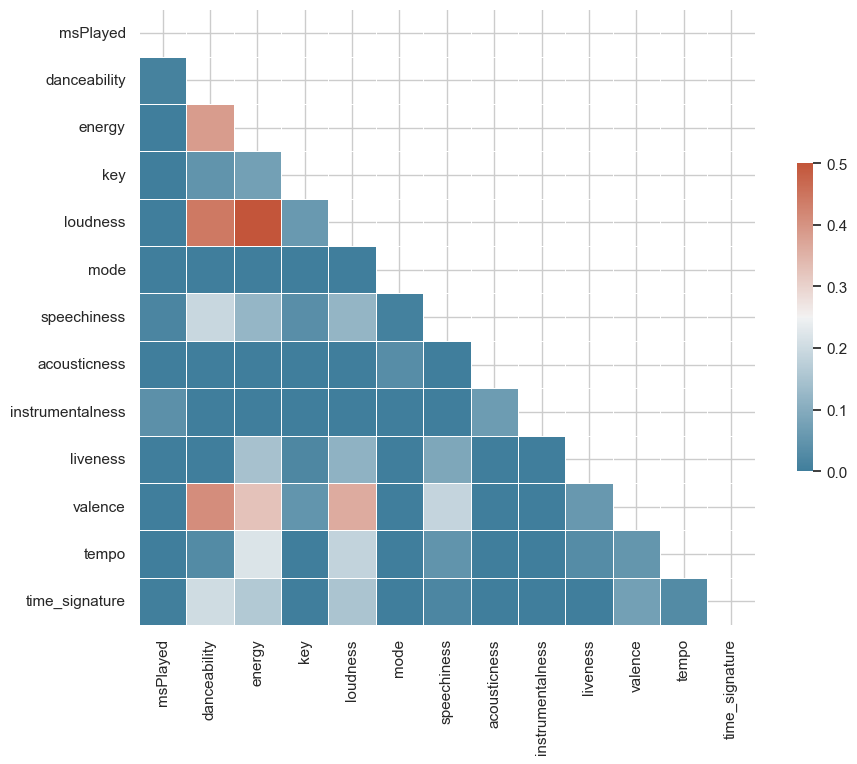

In [163]:
numeric_columns = distinct_song.select_dtypes(include=[np.number]).columns
correlation_matrix = distinct_song[numeric_columns].corr()
# Generate a mask for the upper triangle
#   mask = np.triu(np.ones_like(distinct_song.corr(), dtype=bool))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(distinct_song.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
           # square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmin=0, vmax=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap we can see that there is a huge correlation between:
- loudness X energy
- valence X danceability
- valence X energy
- valence X loudness
- energy X time_signature

<Axes: xlabel='danceability', ylabel='tempo'>

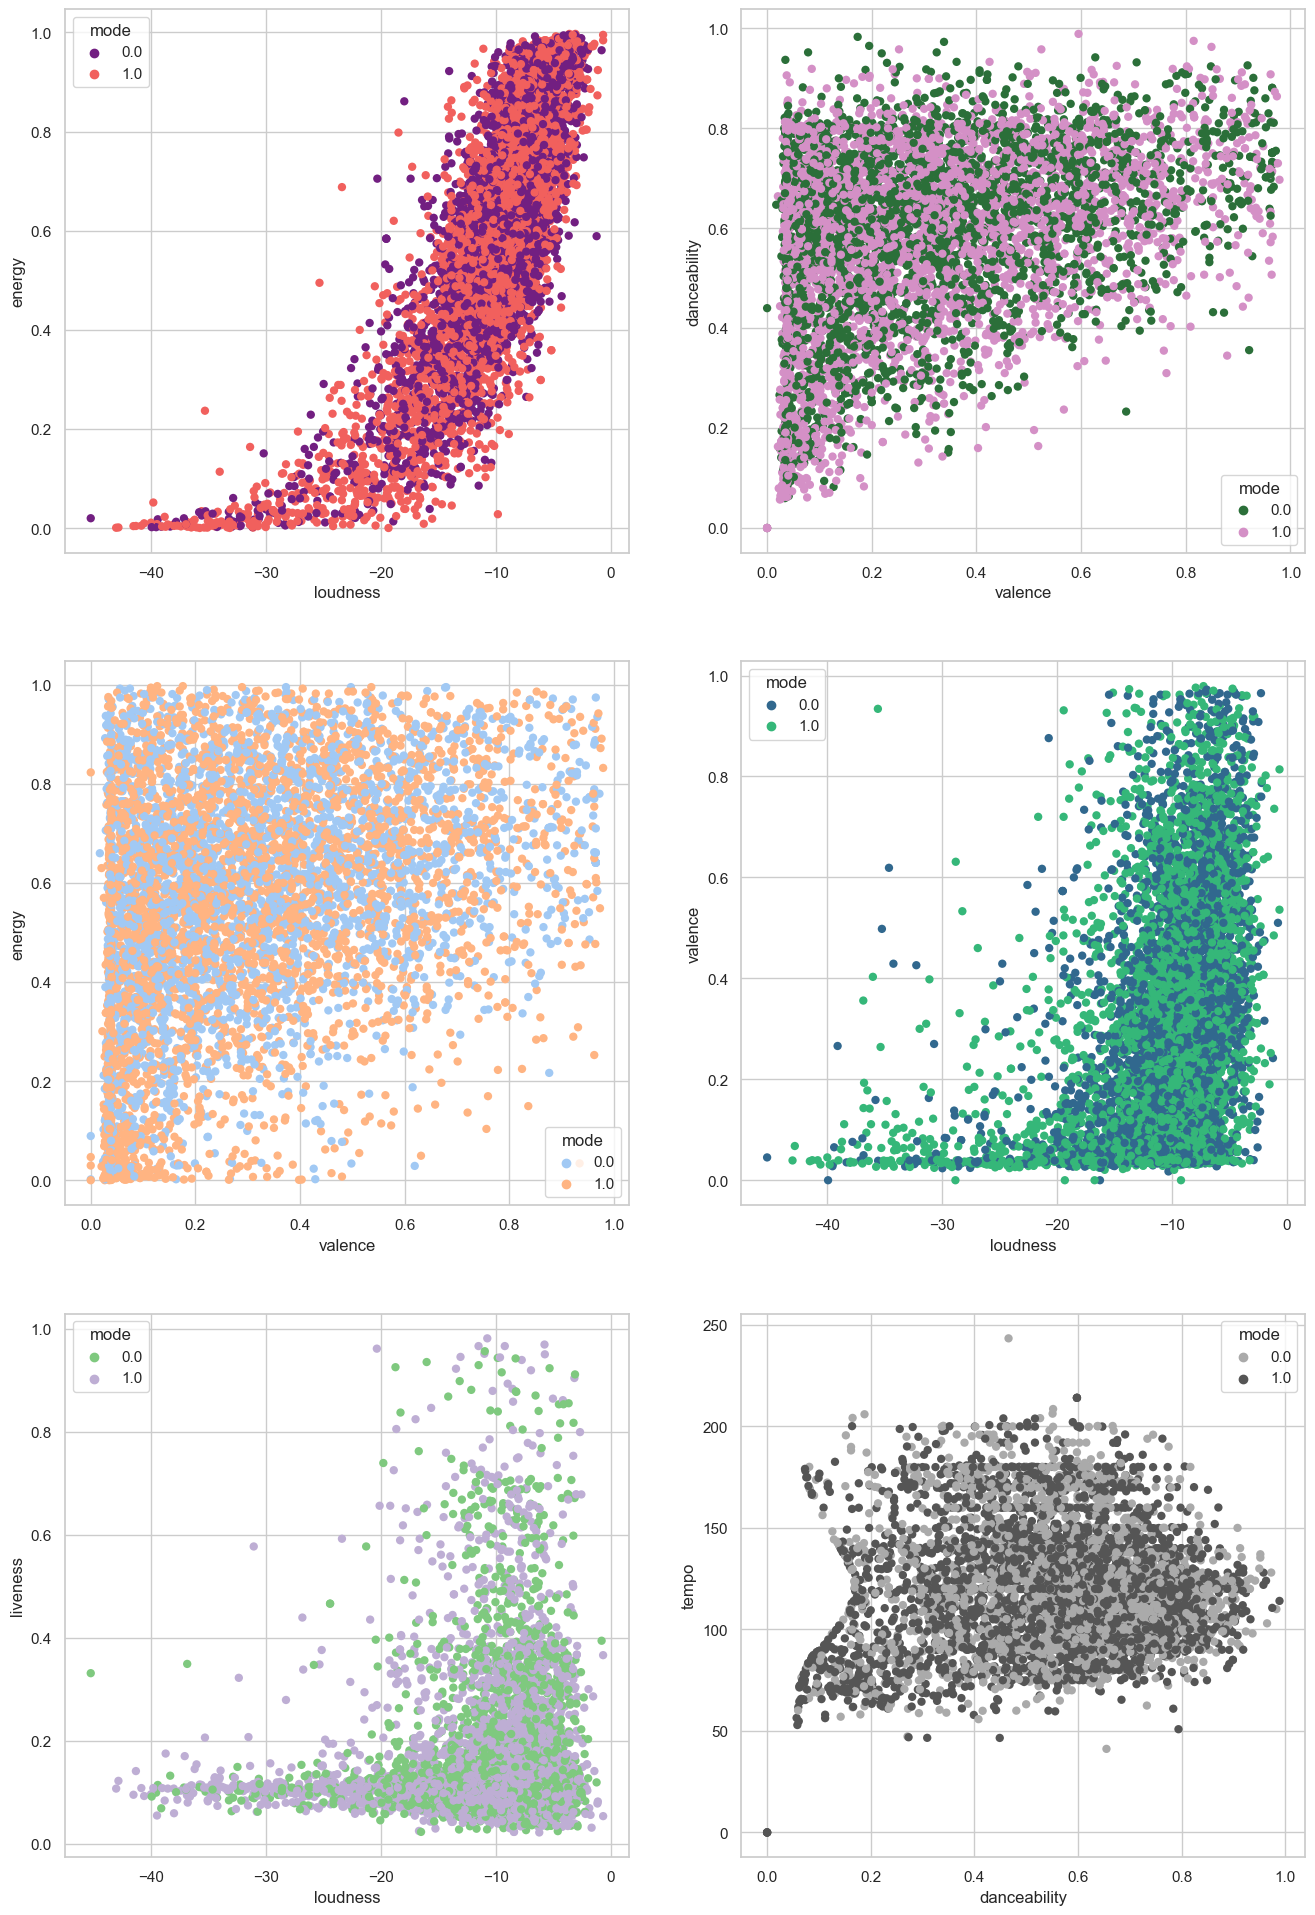

In [164]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=distinct_song, ax=ax[2][1])

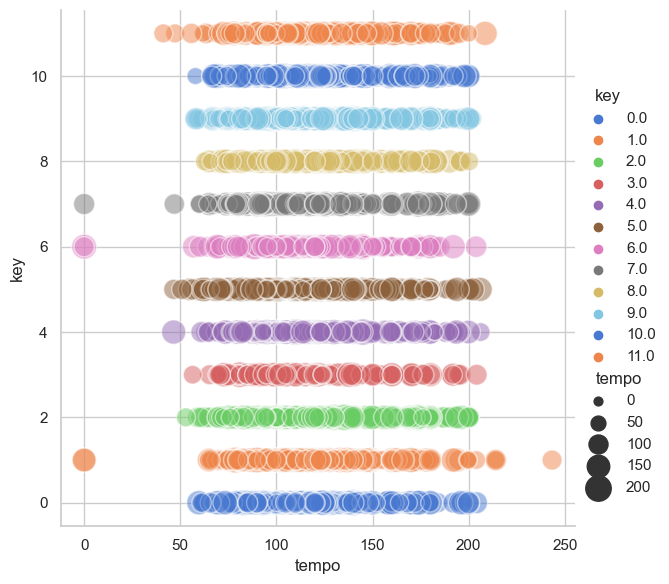

In [165]:
sns.relplot(x="tempo", y="key", hue="key", size=my_streaming['tempo'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=distinct_song)

In [36]:
table = pd.pivot_table(distinct_song,index=['artistName'], values = ['key'], aggfunc=np.mean)
table

key
artistName        
((( O )))      3.0
16BL           5.0
2 bucks       11.0
21street       0.0
3 Doors Down  11.0
...            ...
厉书壹            3.0
向井秀徳           5.0
王美柔            9.0
耳鳴り 専門医        5.0
黄百冰           11.0

[2756 rows x 1 columns]

# 3. My Playlists Analysis

In [177]:
df = pd.read_csv('playlist.csv')
df.head(3)

Unnamed: 0  id              spotify_id       list_name  \
0           0   1  7nAScwBKXcvE6V2oe6KQkb  My Playlist #8   
1           1   1  7nAScwBKXcvE6V2oe6KQkb  My Playlist #8   
2           2   1  7nAScwBKXcvE6V2oe6KQkb  My Playlist #8   

                  list_id                 song_id        song_name  \
0  7nAScwBKXcvE6V2oe6KQkb  1ty518HppLocYdQXEznYDb       Nityananda   
1  7nAScwBKXcvE6V2oe6KQkb  7yxHmqBrmFPGD3ifItlhCM     Rama Raghava   
2  7nAScwBKXcvE6V2oe6KQkb  3VZ7ThgOLB9PiaTrmeLnpl  Sri Siksastakam   

          artist  popularity release_date  ...    tempo  speechiness  \
0  Shanti People          15   2017-04-18  ...   94.998       0.0438   
1  Shanti People           8   2013-10-22  ...  121.020       0.0462   
2  Shanti People          13   2013-10-22  ...  120.037       0.1420   

   acousticness  instrumentalness  danceability  duration_ms  loudness  \
0        0.0614          0.000000         0.715       420857    -8.411   
1        0.3880          0.000150         0.726       264000    -6.328   
2        0.0518          0.000006         0.678       382000    -6.279   

   valence  mode  key  
0    0.719     1   10  
1    0.399     0    6  
2    0.411     1    8  

[3 rows x 22 columns]

## Comparing different playlists

In [178]:
from math import pi

In [179]:
radar = df.groupby('list_name')[['energy', 'danceability', 'valence', 'liveness', 'acousticness']].aggregate(np.mean)
radar.head(3)

energy  danceability   valence  liveness  acousticness
list_name                                                                    
My Playlist #8       0.645340      0.648200  0.244546  0.184388      0.112641
Sanctuary Of Sounds  0.484944      0.746667  0.409122  0.125417      0.213684

In [180]:
playlist_names = radar.index.to_list()
playlist_names

['My Playlist #8', 'Sanctuary Of Sounds']

## Different features of the Playlists

In [181]:
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = radar.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [182]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

IndexError: list index out of range

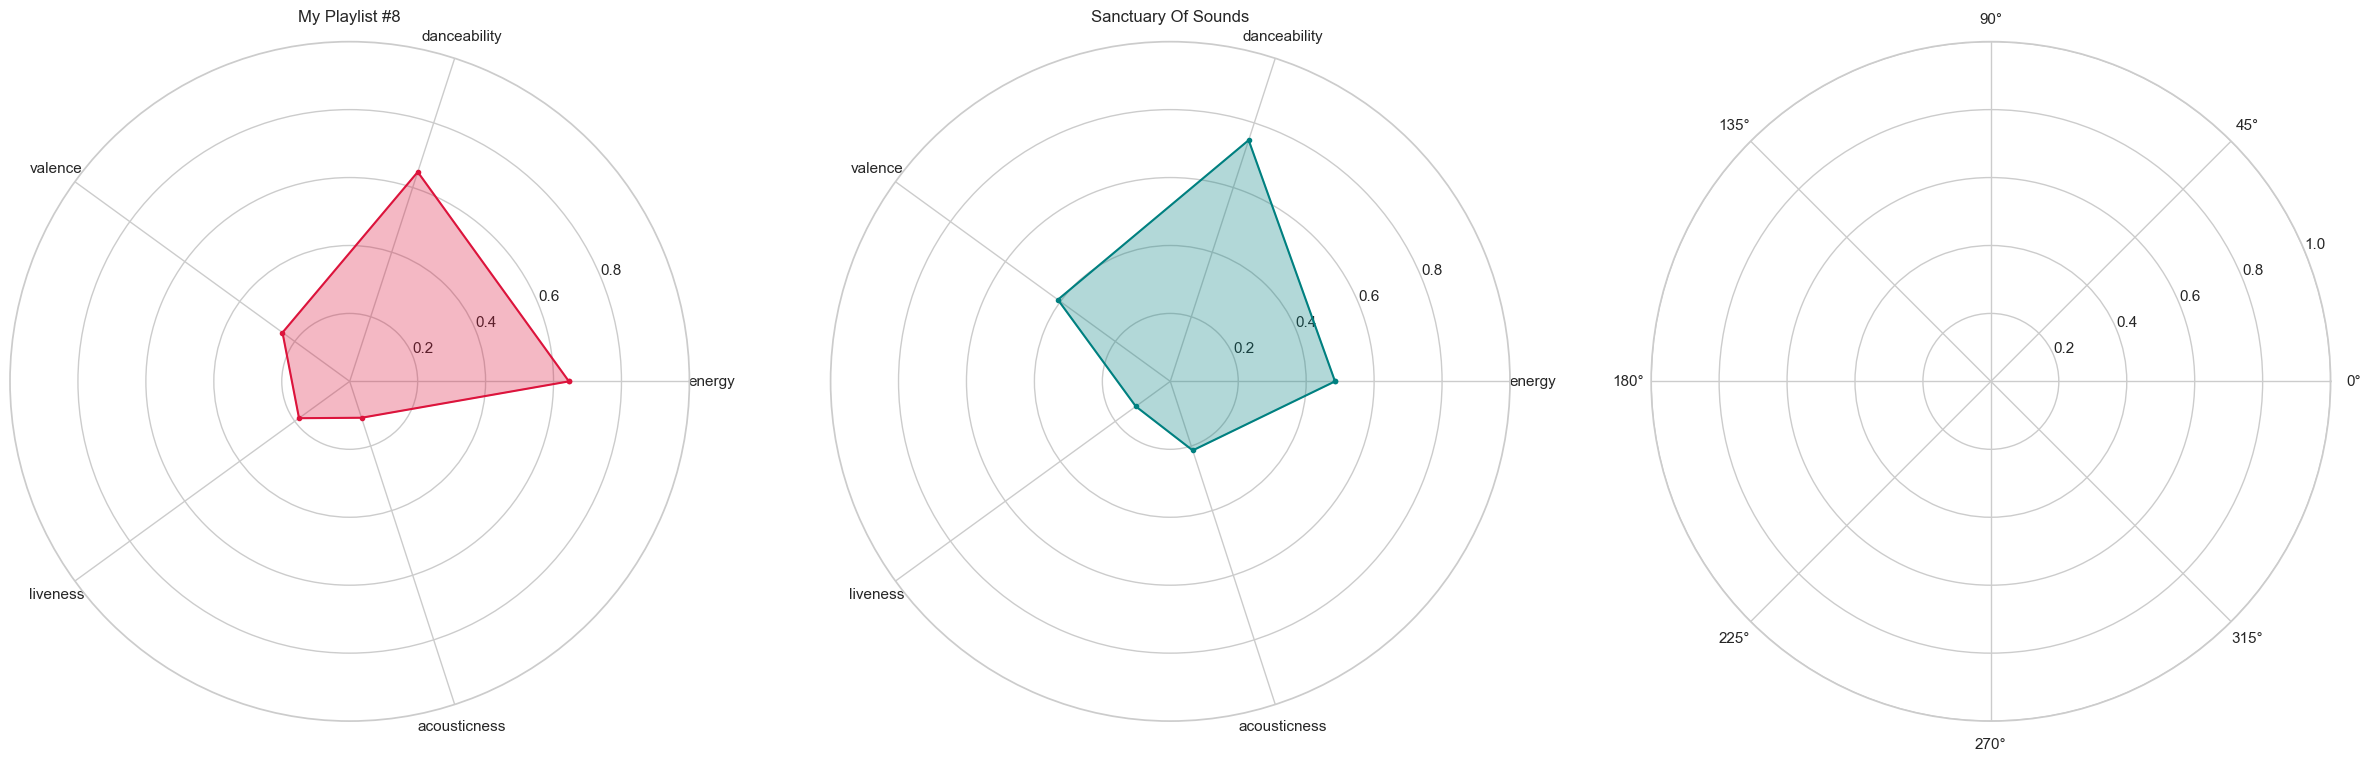

In [183]:
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(playlist_names[i])
  plot_radar(i,color[i])

plt.show()

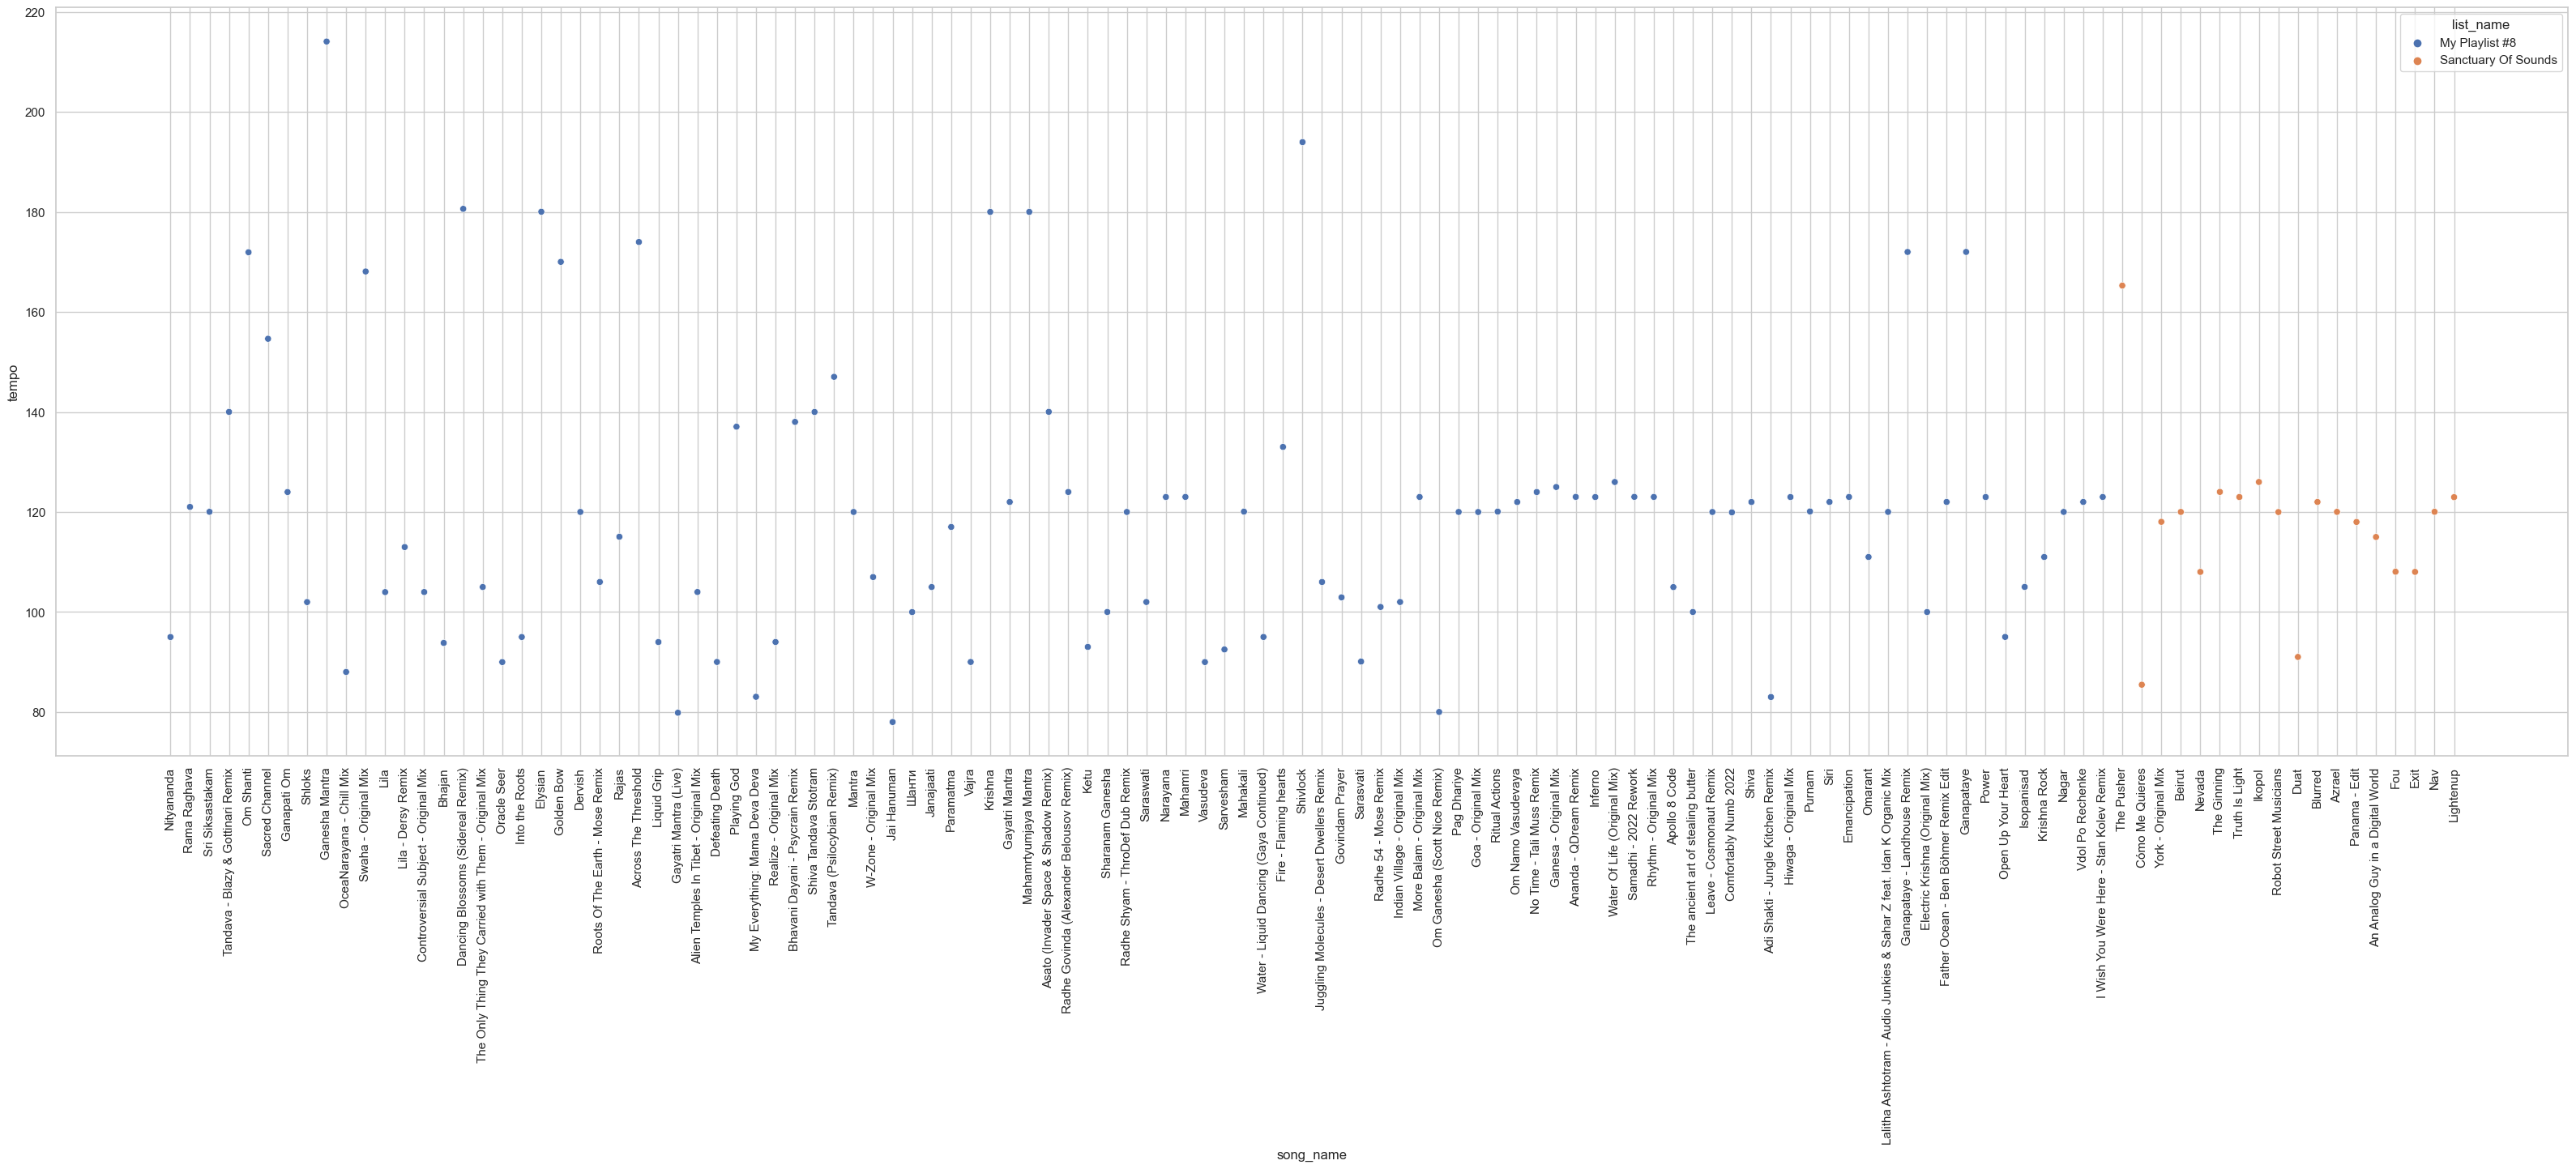

In [184]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='tempo', hue='list_name')
plt.xticks(rotation=90)
plt.show()

## Different songs as per year

In [192]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

def get_year(date):
    if pd.notnull(date):
        return date.year
    else:
        return None

df['year'] = df['release_date'].apply(get_year)


In [193]:
idx = pd.DataFrame(range(1971,2020),columns=['Release Year'])

# then merge the idx with df"release_year" that is just created
release_year = pd.merge(idx, df[['song_id', 'year']], how='left',left_on='Release Year',right_on = 'year', copy=False)

release_year.drop("year",inplace=True,axis=1)
release_year.head(3)

Release Year song_id
0          1971     NaN
1          1972     NaN
2          1973     NaN

In [194]:
release_year = release_year.groupby('Release Year', as_index=False)['song_id'].count()
release_year.head(3)

Release Year  song_id
0          1971        0
1          1972        0
2          1973        0

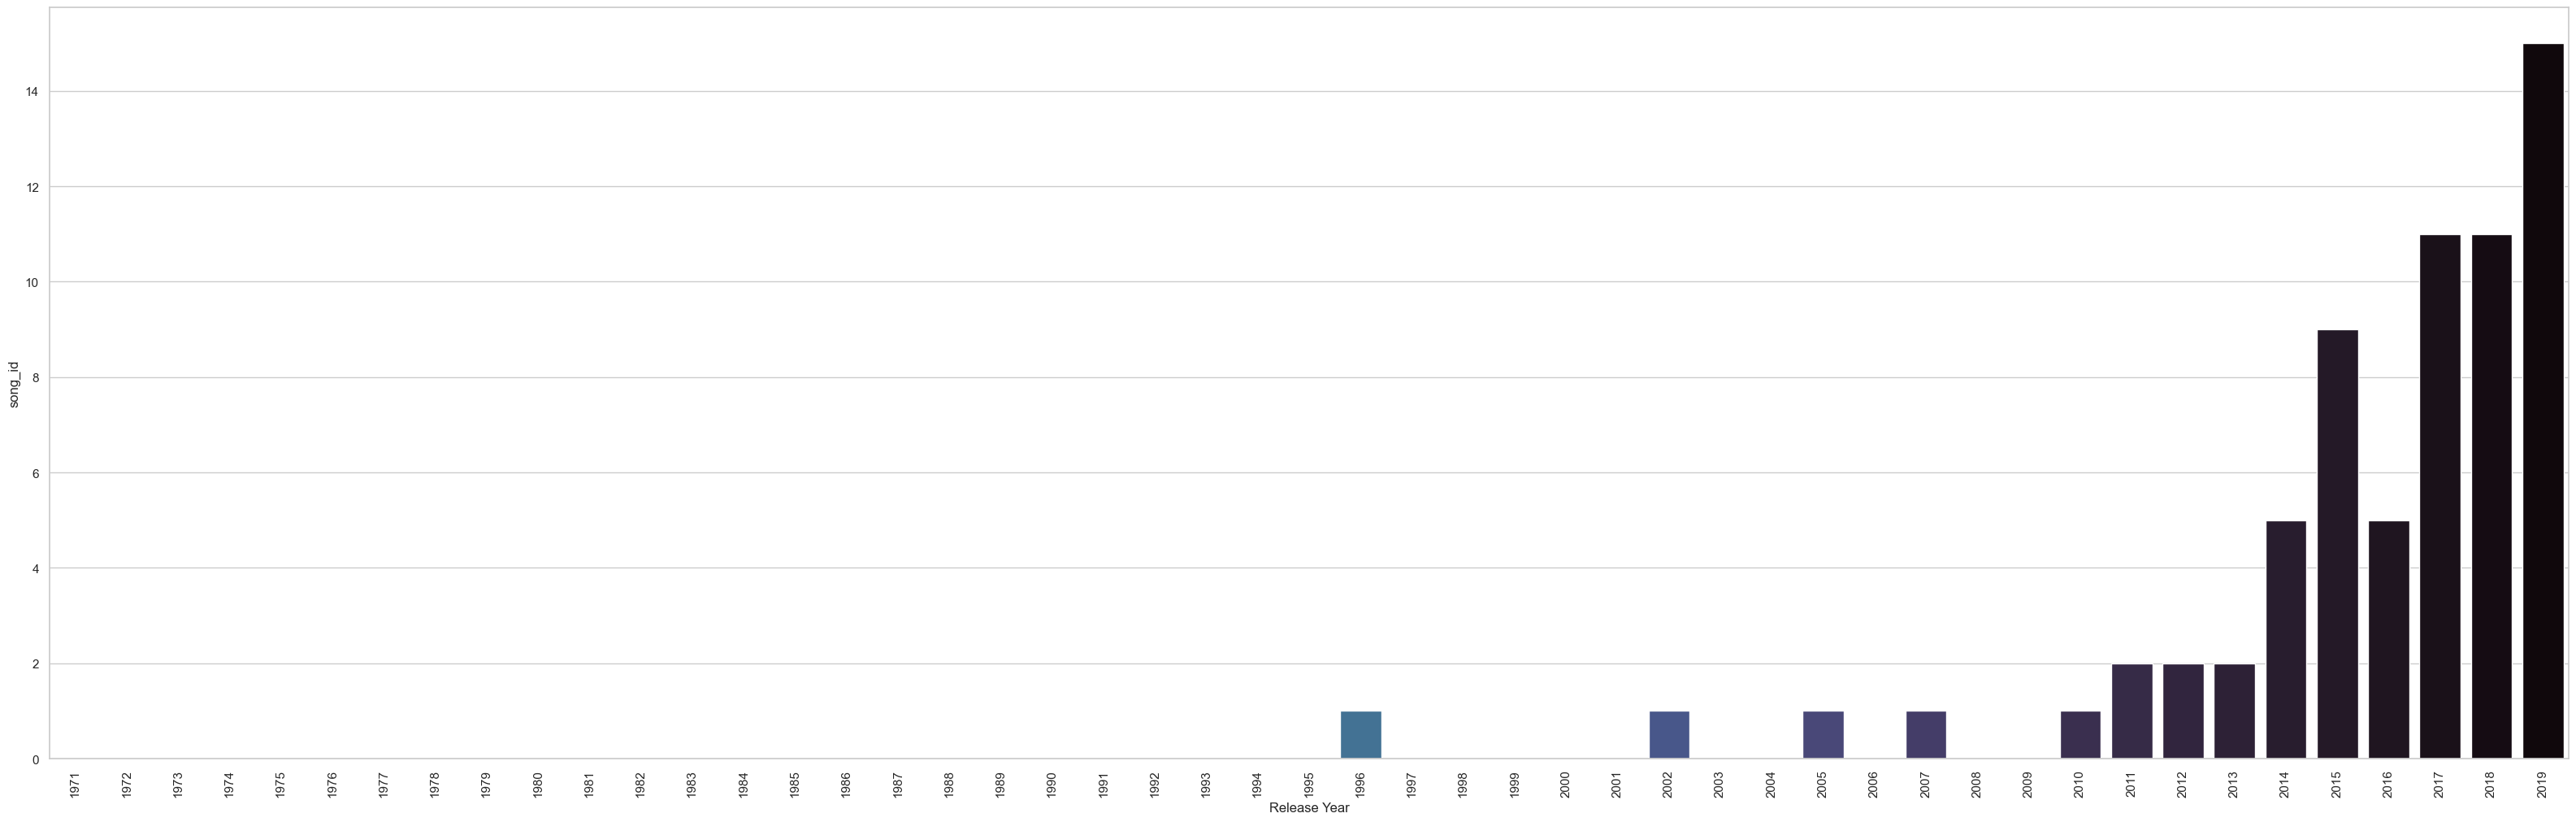

In [195]:
sns.barplot(data=release_year, x='Release Year', y='song_id', palette='mako_r')
plt.xticks(rotation=90)
plt.show()

Most of the songs I listen to are the recent ones

## Count of songs for each modes

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


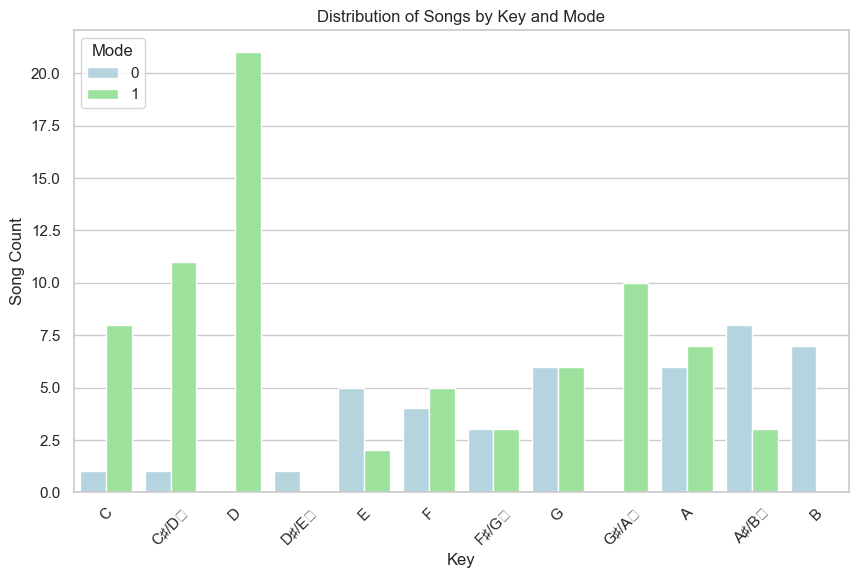

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

key_mode = df.groupby(["key","mode"], as_index=False)["song_id"].count()

# Map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}

# Replace key values with corresponding keys in alphabet
key_mode['key'] = key_mode['key'].map(key_dic)

# Set the color palette for different modes
palette = ['lightblue', 'lightgreen', 'lightgray']

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode', palette=palette)

# Customize the plot
plt.title('Distribution of Songs by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Song Count')
plt.xticks(rotation=45)
plt.legend(title='Mode')

# Display the plot
plt.show()
